 ## Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday).

### I have loaded the cases data as we have change in dates and making a copy of that

In [48]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/naramsupriya/Downloads/covid_confirmed_usafacts.csv')
#As we need to focus on the analysis of selected dates, starts from 2020, July - 2020, December.
#we need make a copy of covid_confirmed_usafacts so that our original dataframe will be not changed
cases= df.copy(deep=True)
# we are using deep to make a copy of our dataframe
print(cases.head(5))

   countyFIPS            County Name State  StateFIPS  1/22/20  1/23/20  \
0           0  Statewide Unallocated    AL          1        0        0   
1        1001        Autauga County     AL          1        0        0   
2        1003        Baldwin County     AL          1        0        0   
3        1005        Barbour County     AL          1        0        0   
4        1007           Bibb County     AL          1        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/14/23  7/15/23  7/16/23  \
0        0        0        0        0  ...        0        0        0   
1        0        0        0        0  ...    19913    19913    19913   
2        0        0        0        0  ...    70521    70521    70521   
3        0        0        0        0  ...     7582     7582     7582   
4        0        0        0        0  ...     8149     8149     8149   

   7/17/23  7/18/23  7/19/23  7/20/23  7/21/23  7/22/23  7/23/23  
0        0        0        0        0      

### As we need to focus on the analysis of selected dates, starts from 2020 June - 2021 Jan. we need select columns from that dates

In [7]:
import pandas as pd

# Assuming 'cases' is our original DataFrame

# Create DataFrames for 'countyFIPS', 'County Name', 'State', and 'StateFIPS' columns
metadata_columns = cases[['countyFIPS', 'County Name', 'State', 'StateFIPS']]

# Define the start and end dates for the date range
start_date = '6/1/20'    # First Monday in July
end_date = '1/3/21'   # Last Sunday in December

# Find the column indices based on the date range
start_idx = cases.columns.get_loc(start_date)
end_idx = cases.columns.get_loc(end_date)

# Select the columns you want to keep within the date range from 
#the syntax we can say that we want all rows but only some columns
ourdates = cases.iloc[:, start_idx:end_idx+1 ]
#as we will lose first 4 columns we will use concat function 
# Concatenate the metadata columns and the required date range columns
june_jan_cases = pd.concat([metadata_columns, ourdates], axis=1)
 
print(june_jan_cases)
june_jan_cases.to_csv('june_jan_cases.csv' , index=False)

      countyFIPS            County Name State  StateFIPS  6/1/20  6/2/20  \
0              0  Statewide Unallocated    AL          1       0       0   
1           1001        Autauga County     AL          1     233     238   
2           1003        Baldwin County     AL          1     292     292   
3           1005        Barbour County     AL          1     172     175   
4           1007           Bibb County     AL          1      76      76   
...          ...                    ...   ...        ...     ...     ...   
3188       56037     Sweetwater County     WY         56      30      30   
3189       56039          Teton County     WY         56     100     100   
3190       56041          Uinta County     WY         56      12      13   
3191       56043       Washakie County     WY         56      37      37   
3192       56045         Weston County     WY         56       1       1   

      6/3/20  6/4/20  6/5/20  6/6/20  ...  12/25/20  12/26/20  12/27/20  \
0          0

### We are now creating new dataframe weekly cases for our statistics

In [8]:
weeklycases_jj = june_jan_cases.loc[:,('countyFIPS','County Name','State','StateFIPS')]
weeklycases_jj

,countyFIPS,County Name,State,StateFIPS
0,0,Statewide Unallocated,AL,1
1,1001,Autauga County,AL,1
2,1003,Baldwin County,AL,1
3,1005,Barbour County,AL,1
4,1007,Bibb County,AL,1
...,...,...,...,...
3188,56037,Sweetwater County,WY,56
3189,56039,Teton County,WY,56
3190,56041,Uinta County,WY,56
3191,56043,Washakie County,WY,56


### we need to do some changes to weeklyCases for that we are using melt function and the changes are to be done on the dates 

In [9]:

# Using the melt function to covert wide dataframe into long dataframe so that we can perform operations on the data easily.

weekly_cases_jj=pd.melt(june_jan_cases,id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name='Date',value_name= 'cases')
print(weekly_cases_jj)
weekly_cases_jj.to_csv('weekly_cases_jj.csv' , index=False)


        countyFIPS            County Name State  StateFIPS    Date  cases
0                0  Statewide Unallocated    AL          1  6/1/20      0
1             1001        Autauga County     AL          1  6/1/20    233
2             1003        Baldwin County     AL          1  6/1/20    292
3             1005        Barbour County     AL          1  6/1/20    172
4             1007           Bibb County     AL          1  6/1/20     76
...            ...                    ...   ...        ...     ...    ...
692876       56037     Sweetwater County     WY         56  1/3/21   3020
692877       56039          Teton County     WY         56  1/3/21   2159
692878       56041          Uinta County     WY         56  1/3/21   1570
692879       56043       Washakie County     WY         56  1/3/21    783
692880       56045         Weston County     WY         56  1/3/21    477

[692881 rows x 6 columns]


In [10]:
weekly_cases_jj

,countyFIPS,County Name,State,StateFIPS,Date,cases
0,0,Statewide Unallocated,AL,1,6/1/20,0
1,1001,Autauga County,AL,1,6/1/20,233
2,1003,Baldwin County,AL,1,6/1/20,292
3,1005,Barbour County,AL,1,6/1/20,172
4,1007,Bibb County,AL,1,6/1/20,76
...,...,...,...,...,...,...
692876,56037,Sweetwater County,WY,56,1/3/21,3020
692877,56039,Teton County,WY,56,1/3/21,2159
692878,56041,Uinta County,WY,56,1/3/21,1570
692879,56043,Washakie County,WY,56,1/3/21,783


## Linear and Non-Linear (polynomial with degree n) regression models X-Axis - number of days, Y-Axis number of new cases for a specific state

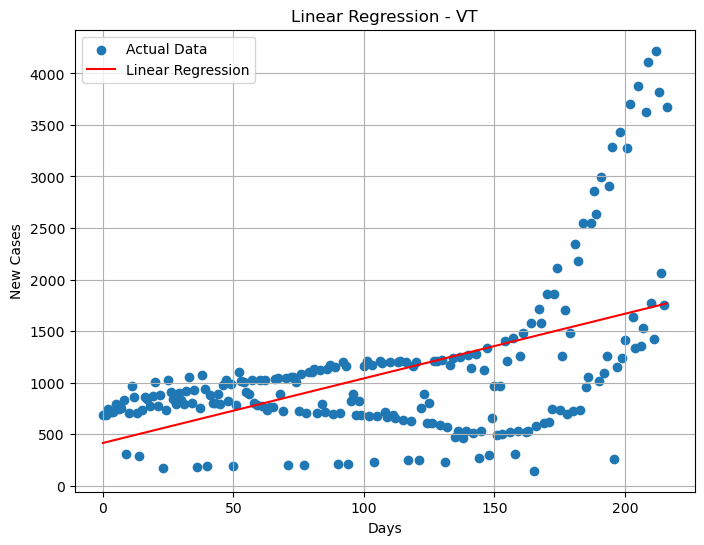

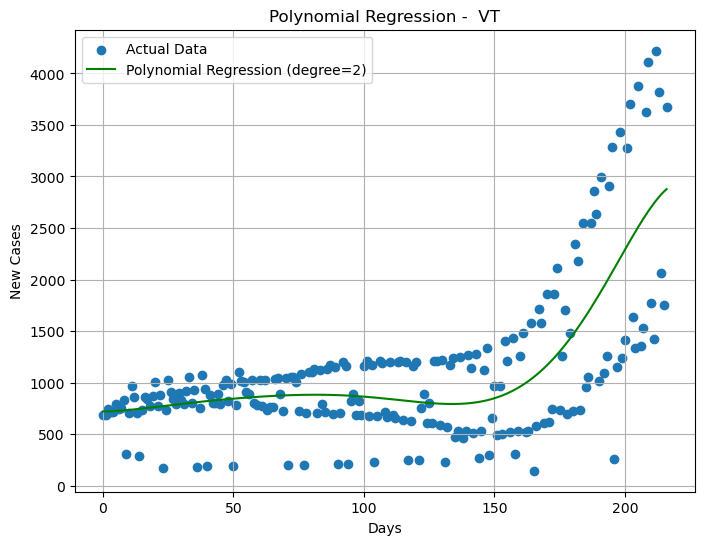

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Assuming 'data' is your DataFrame containing the data
weekly_cases_jj['Date'] = pd.to_datetime(weekly_cases_jj['Date'])

# Sort the DataFrame by date and reset the index
weekly_cases_jj = weekly_cases_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weekly_cases_jj.groupby('Date')

# Calculate the new cases for each group (date)
weekly_cases_jj['new_cases'] = grouped['cases'].diff().fillna(0)

# Set negative new cases to zero
weekly_cases_jj['new_cases'] = weekly_cases_jj['new_cases'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'New York' (replace with your state name)
selected_state = 'VT'

# Filter data for the selected state
state_data = weekly_cases_jj[weekly_cases_jj['State'] == selected_state]


ddaywise = state_data.groupby(['Date'])['new_cases'].sum().reset_index()
ddaywise['new_cases'] = ddaywise['new_cases'].astype(int)
 
start_date = pd.to_datetime('6/1/20') 
ddaywise['Days'] = (ddaywise['Date'] - start_date).dt.days
# Assuming 'X' represents your independent variable and 'y' is the target variable (e.g., 'New Cases')
X = ddaywise['Days'].values.reshape(-1, 1)
y = ddaywise['new_cases'].values
 
# Linear Regression
 
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred_linear = linear_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')

plt.xlabel('Days')
plt.ylabel('New Cases')
plt.title(f'Linear Regression - {selected_state}')
plt.legend()
plt.grid(True)
plt.show()
# Polynomial Regression (let's say a polynomial of degree 2)
 
poly_features = PolynomialFeatures(degree=7)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression (degree=7)')

plt.xlabel('Days')
plt.ylabel('New Cases')
plt.title(f'Polynomial Regression -  {selected_state}')
plt.legend()
plt.grid(True)
plt.show()
 

 

## Linear and Non-Linear (polynomial with degree n) regression models X-Axis - number of days, Y-Axis number of new cases  for top 5 with highest number of cases.

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/2335443905.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Days'] = (state_data['Date'] - start_date).dt.days


<Figure size 1200x800 with 0 Axes>

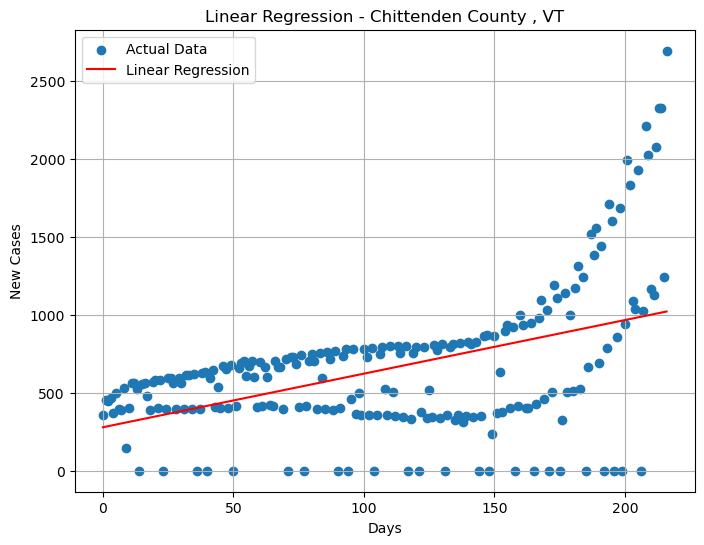

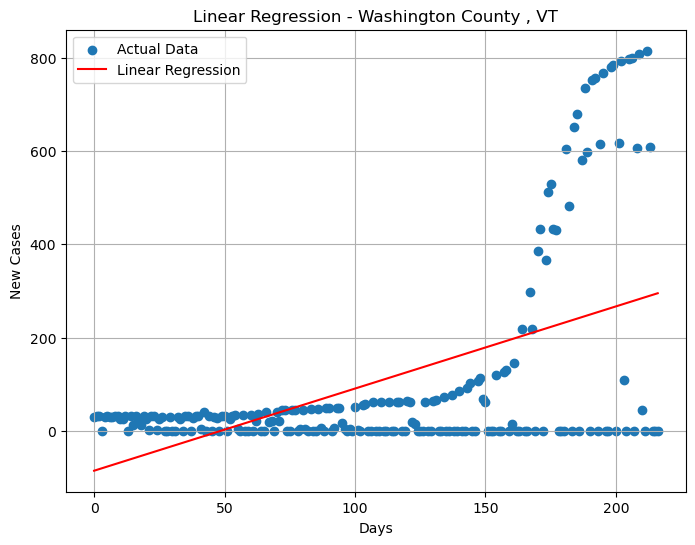

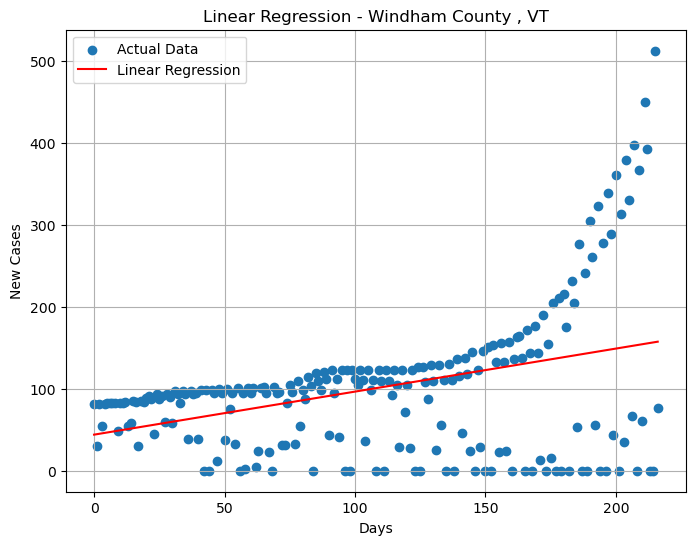

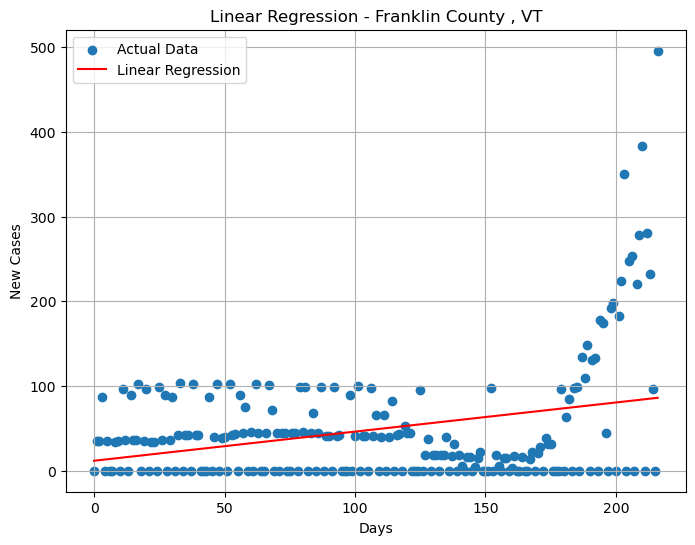

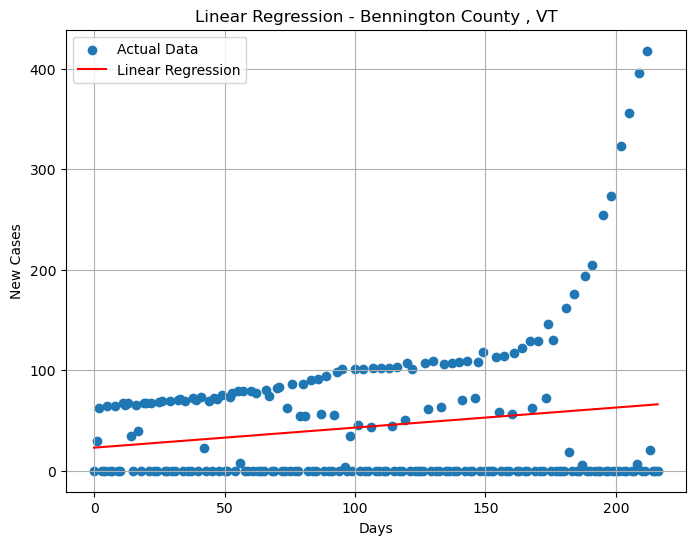

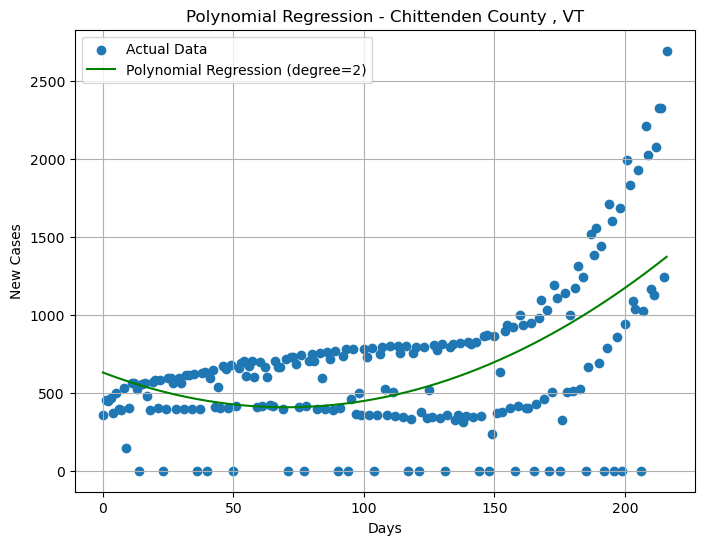

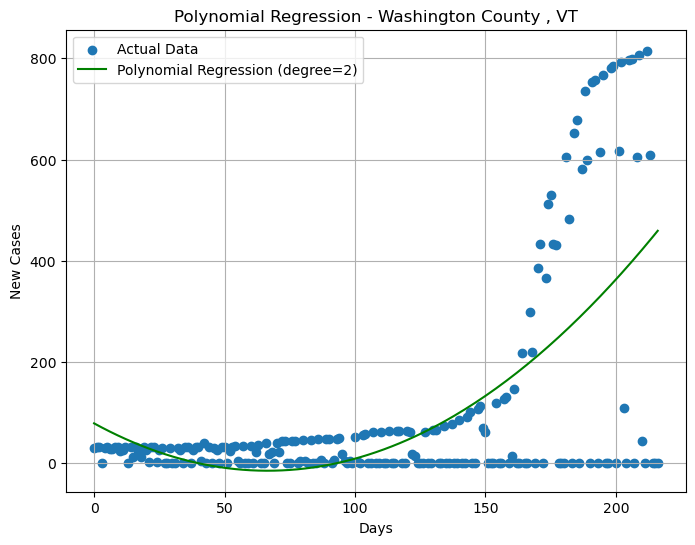

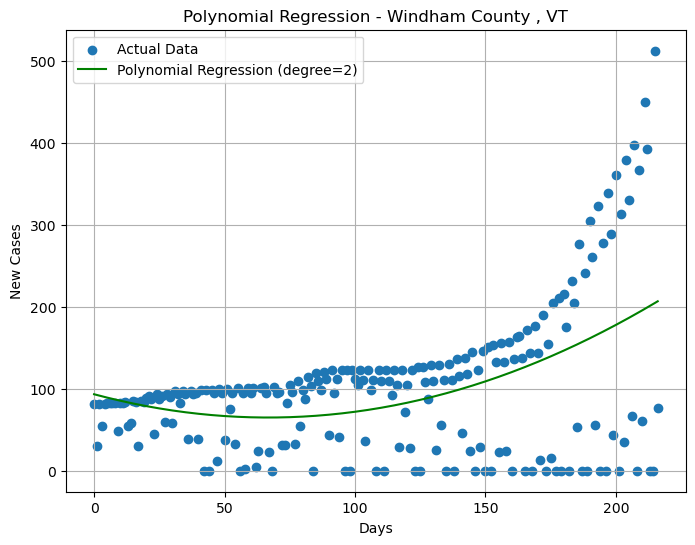

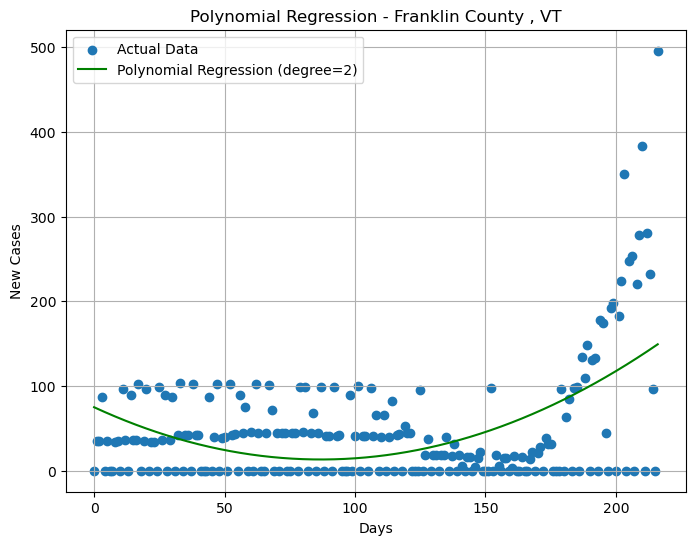

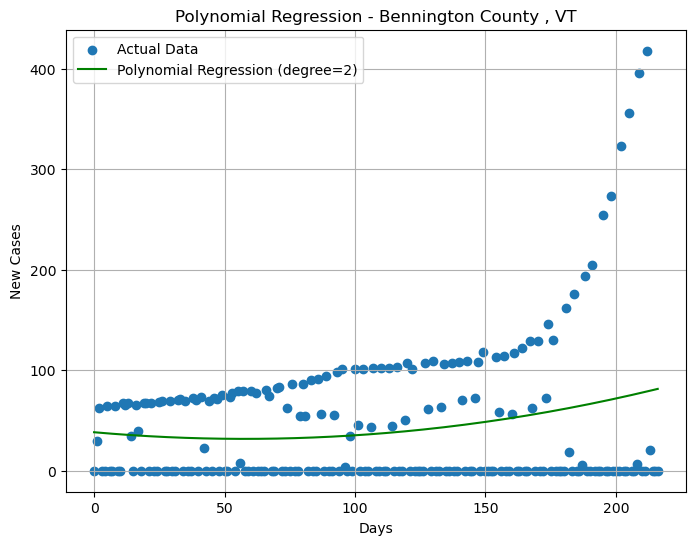

In [82]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

weekly_cases_jj['Date'] = pd.to_datetime(weekly_cases_jj['Date'])

# Sort the DataFrame by date and reset the index
weekly_cases_jj = weekly_cases_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weekly_cases_jj.groupby('Date')

# Calculate the new cases for each group (date)
weekly_cases_jj['new_cases'] = grouped['cases'].diff().fillna(0)

# Set negative new cases to zero
weekly_cases_jj['new_cases'] = weekly_cases_jj['new_cases'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'New York' (replace with your state name)
selected_state = 'VT'

# Filter data for the selected state
state_data = weekly_cases_jj[weekly_cases_jj['State'] == selected_state]
 
start_date = pd.to_datetime('6/1/20') 
state_data['Days'] = (state_data['Date'] - start_date).dt.days


# Group data by State and County, get the top 5 counties with the highest cases
top_counties = state_data.groupby('County Name').sum().nlargest(5, 'new_cases')

plt.figure(figsize=(12, 8))

# Perform linear and polynomial regression for each county and plot the graphs
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]

    X = county_data['Days'].values.reshape(-1, 1)  # Assuming the index represents days
    y = county_data['new_cases'].values

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X, y)
    y_pred_linear = linear_reg.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, y_pred_linear, color='red', label='Linear Regression')

    plt.xlabel('Days')
    plt.ylabel('New Cases')
    plt.title(f'Linear Regression - {county}, {selected_state}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot polynomial regression for each county
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]

    X = county_data['Days'].values.reshape(-1, 1)   # Assuming the index represents days
    y = county_data['new_cases'].values

    # Polynomial Regression (degree 2)
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression (degree=2)')

    plt.xlabel('Days')
    plt.ylabel('New Cases')
    plt.title(f'Polynomial Regression - {county}, {selected_state}')
    plt.legend()
    plt.grid(True)
    plt.show()

## Same For Deaths

In [13]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/covid_deaths_usafacts.csv')
#As we need to focus on the analysis of selected dates, starts from 2020, July - 2020, December.
#we need make a copy of covid_confirmed_usafacts so that our original dataframe will be not changed
deaths= df.copy(deep=True)
# we are using deep to make a copy of our dataframe
print(deaths.head(5))
#now we have a dataframe cases with exact same information

   countyFIPS            County Name State  StateFIPS  2020-01-22  2020-01-23  \
0           0  Statewide Unallocated    AL          1           0           0   
1        1001        Autauga County     AL          1           0           0   
2        1003        Baldwin County     AL          1           0           0   
3        1005        Barbour County     AL          1           0           0   
4        1007           Bibb County     AL          1           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2023-07-14  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...         235   
2           0           0           0           0  ...         731   
3           0           0           0           0  ...         104   
4           0           0           0           0  ...         111   

   2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  2023-07-20  \
0           0  

In [14]:
import pandas as pd

# Assuming 'cases' is your original DataFrame

# Create DataFrames for 'countyFIPS', 'County Name', 'State', and 'StateFIPS' columns
metadata_columns = deaths[['countyFIPS', 'County Name', 'State', 'StateFIPS']]

# Define the start and end dates for the date range
 
start_date = '2020-06-01'  # First Monday in July
end_date = '2021-01-03'
# Find the column indices based on the date range
start_idx = deaths.columns.get_loc(start_date)
end_idx = deaths.columns.get_loc(end_date)

# Select the columns you want to keep within the date range
ourdates = deaths.iloc[:, start_idx:end_idx+1 ]

# Concatenate the metadata columns and the required date range columns
june_jan_deaths = pd.concat([metadata_columns, ourdates], axis=1)
 
print(june_jan_deaths.head(5))
 

   countyFIPS            County Name State  StateFIPS  2020-06-01  2020-06-02  \
0           0  Statewide Unallocated    AL          1           0           0   
1        1001        Autauga County     AL          1           5           5   
2        1003        Baldwin County     AL          1           9           9   
3        1005        Barbour County     AL          1           1           1   
4        1007           Bibb County     AL          1           1           1   

   2020-06-03  2020-06-04  2020-06-05  2020-06-06  ...  2020-12-25  \
0           0           0           0           0  ...           0   
1           5           5           5           5  ...          46   
2           9           9           9           9  ...         151   
3           1           1           1           1  ...          32   
4           1           1           1           1  ...          42   

   2020-12-26  2020-12-27  2020-12-28  2020-12-29  2020-12-30  2020-12-31  \
0           0  

In [15]:
weeklydeaths_jj = june_jan_deaths.loc[:,('countyFIPS','County Name','State','StateFIPS')]
weeklydeaths_jj

,countyFIPS,County Name,State,StateFIPS
0,0,Statewide Unallocated,AL,1
1,1001,Autauga County,AL,1
2,1003,Baldwin County,AL,1
3,1005,Barbour County,AL,1
4,1007,Bibb County,AL,1
...,...,...,...,...
3188,56037,Sweetwater County,WY,56
3189,56039,Teton County,WY,56
3190,56041,Uinta County,WY,56
3191,56043,Washakie County,WY,56


In [16]:
weeklydeaths_jj=pd.melt(june_jan_deaths,id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name='Date',value_name= 'deaths')
print(weeklydeaths_jj)
weeklydeaths_jj.to_csv('weeklydeaths_jj.csv' , index=False)

        countyFIPS            County Name State  StateFIPS        Date  deaths
0                0  Statewide Unallocated    AL          1  2020-06-01       0
1             1001        Autauga County     AL          1  2020-06-01       5
2             1003        Baldwin County     AL          1  2020-06-01       9
3             1005        Barbour County     AL          1  2020-06-01       1
4             1007           Bibb County     AL          1  2020-06-01       1
...            ...                    ...   ...        ...         ...     ...
692876       56037     Sweetwater County     WY         56  2021-01-03      16
692877       56039          Teton County     WY         56  2021-01-03       4
692878       56041          Uinta County     WY         56  2021-01-03       7
692879       56043       Washakie County     WY         56  2021-01-03      19
692880       56045         Weston County     WY         56  2021-01-03       2

[692881 rows x 6 columns]


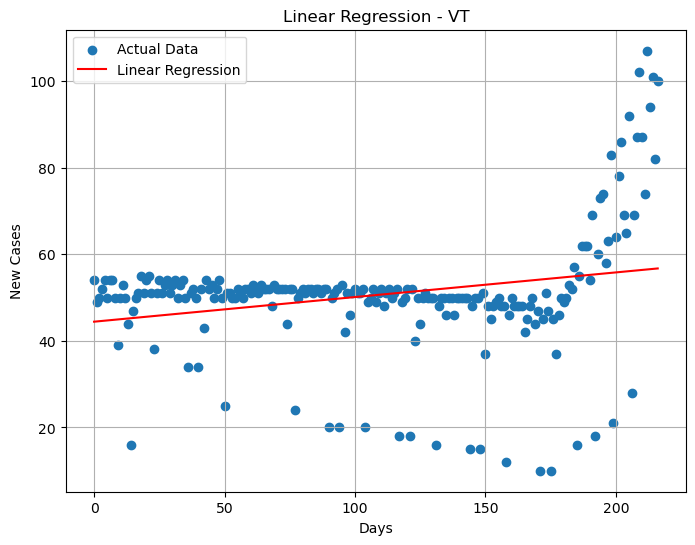

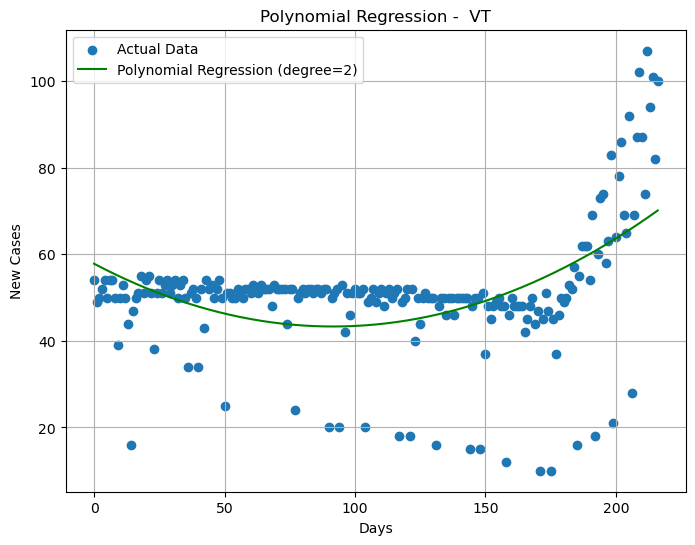

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

 

# Filter data for a specific state, for instance, 'New York' (replace with your state name)
selected_state = 'VT'

# Filter data for the selected state
state_data = weeklydeaths_jj[weeklydeaths_jj['State'] == selected_state]
 
 
 


daywise = state_data.groupby(['Date'])['new_deaths'].sum().reset_index()
daywise['new_deaths'] = daywise['new_deaths'].astype(int)
 
start_date = pd.to_datetime('6/1/20') 
daywise['Days'] = (daywise['Date'] - start_date).dt.days
# Assuming 'X' represents your independent variable and 'y' is the target variable (e.g., 'New Cases')
X = daywise['Days'].values.reshape(-1, 1)
y = daywise['new_deaths'].values
 
# Linear Regression
 
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred_linear = linear_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')

plt.xlabel('Days')
plt.ylabel('New Cases')
plt.title(f'Linear Regression - {selected_state}')
plt.legend()
plt.grid(True)
plt.show()
# Polynomial Regression (let's say a polynomial of degree 2)
 
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression (degree=2)')

plt.xlabel('Days')
plt.ylabel('New Cases')
plt.title(f'Polynomial Regression -  {selected_state}')
plt.legend()
plt.grid(True)
plt.show()
 

 

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/1246699981.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Days'] = (state_data['Date'] - start_date).dt.days


<Figure size 1200x800 with 0 Axes>

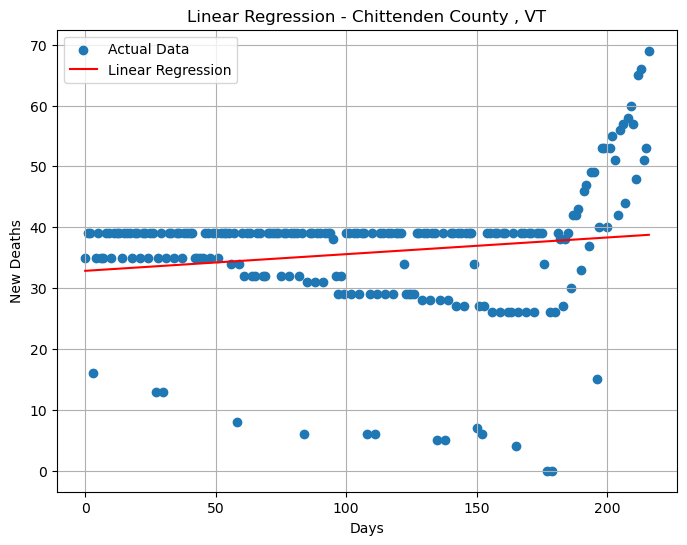

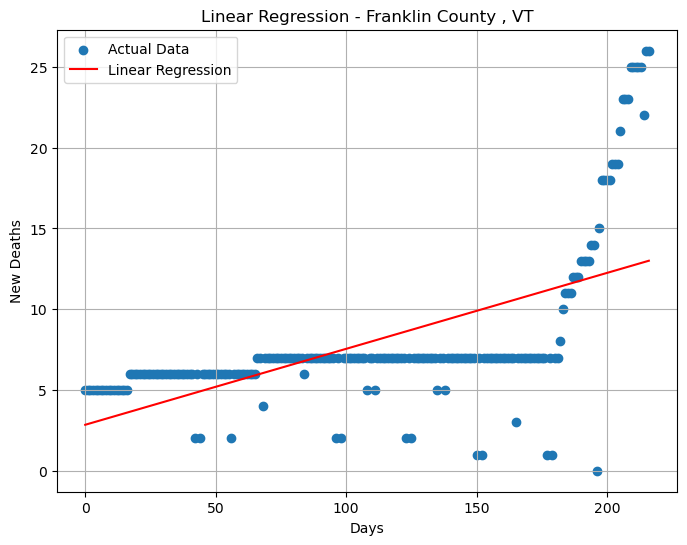

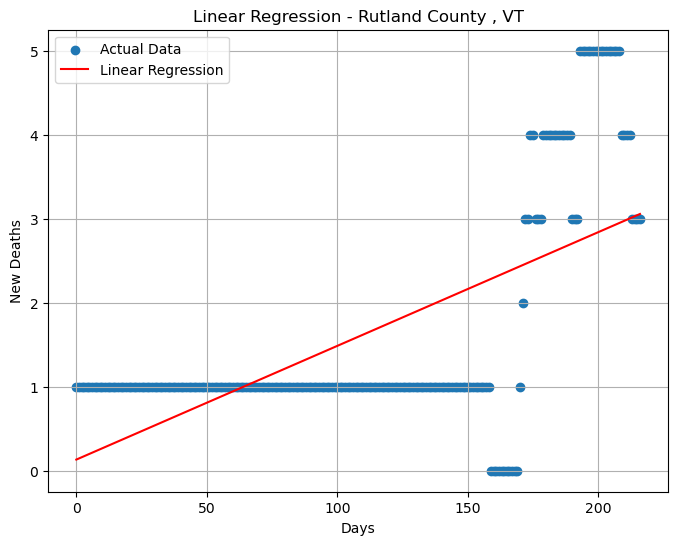

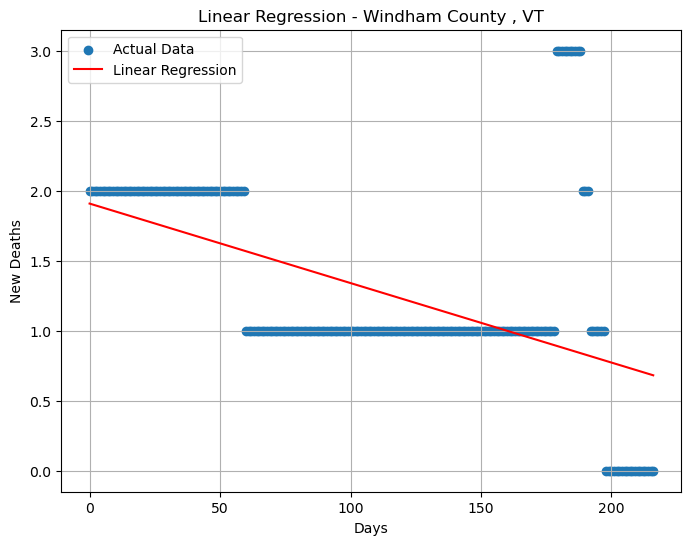

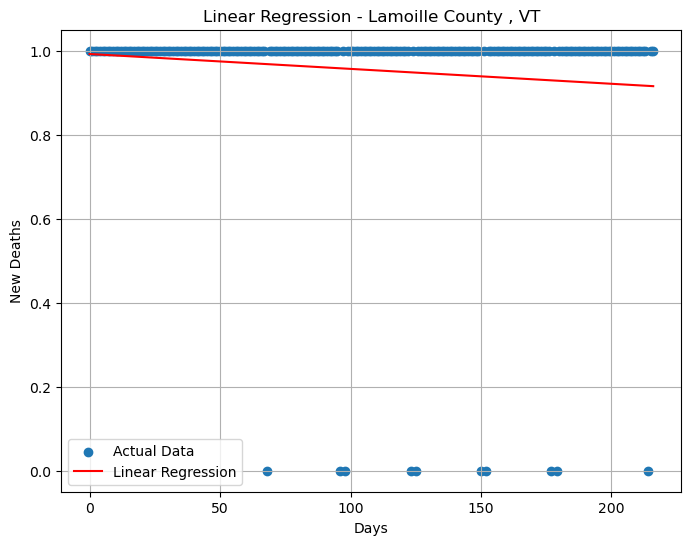

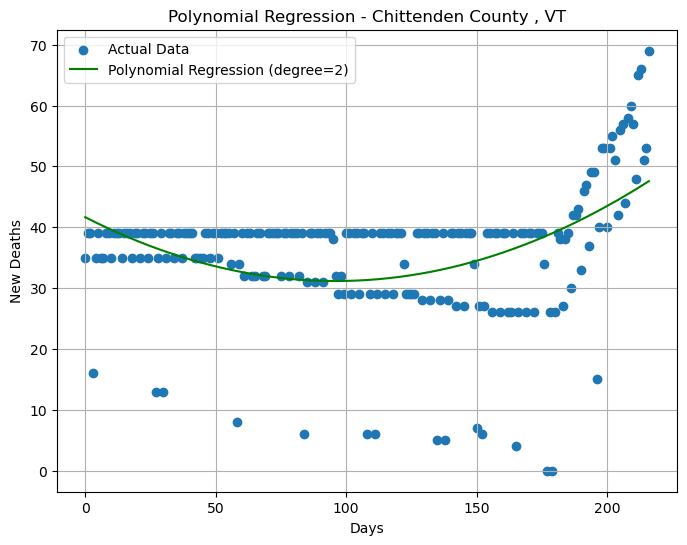

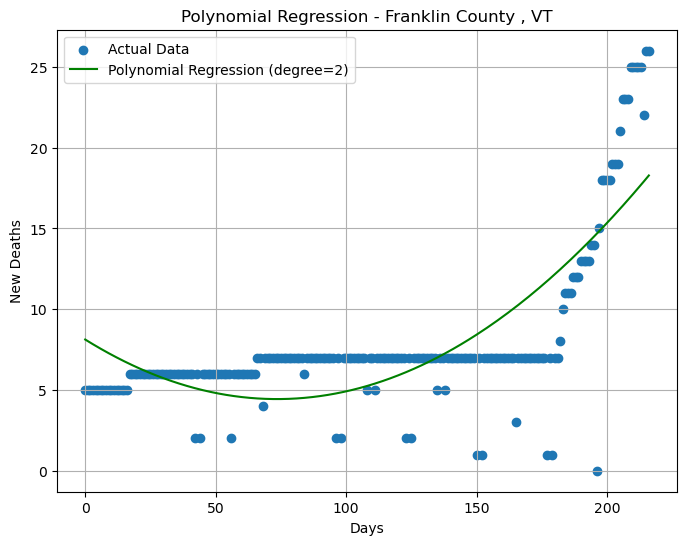

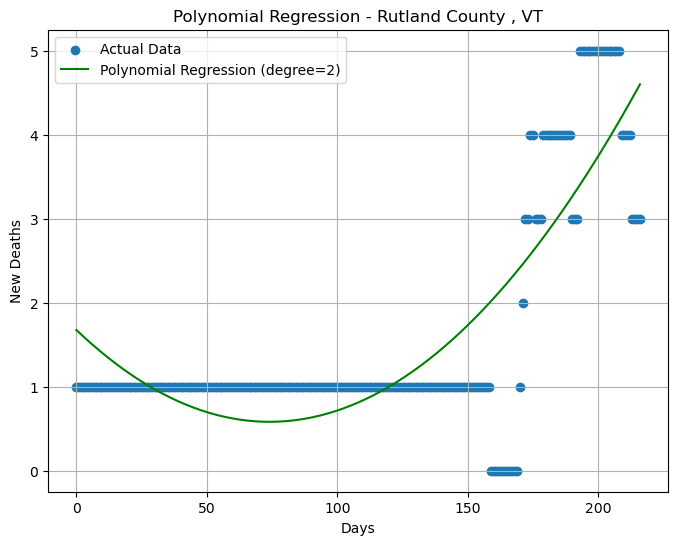

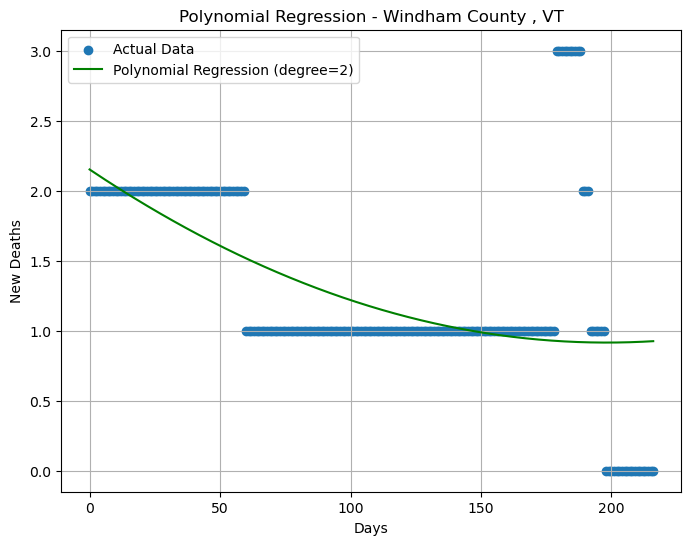

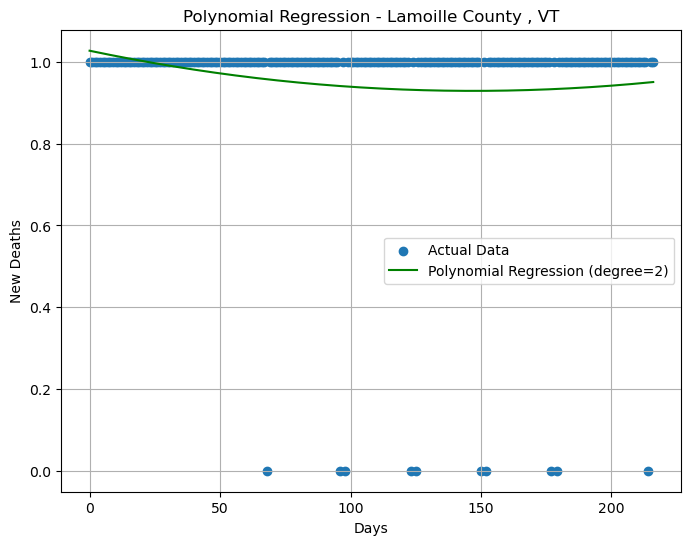

In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
weeklydeaths_jj['Date'] = pd.to_datetime(weeklydeaths_jj['Date'])

# Sort the DataFrame by date and reset the index
weeklydeaths_jj = weeklydeaths_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weeklydeaths_jj.groupby('Date')

# Calculate the new cases for each group (date)
weeklydeaths_jj['new_deaths'] = grouped['deaths'].diff().fillna(0)

# Set negative new cases to zero
weeklydeaths_jj['new_deaths'] = weeklydeaths_jj['new_deaths'].apply(lambda x: max(0, x))

selected_state = 'VT'

# Filter data for the selected state
state_data = weeklydeaths_jj[weeklydeaths_jj['State'] == selected_state]
start_date = pd.to_datetime('2020-06-01') 
state_data['Days'] = (state_data['Date'] - start_date).dt.days

# Group data by State and County, get the top 5 counties with the highest cases
top_counties = state_data.groupby('County Name').sum().nlargest(5, 'new_deaths')

plt.figure(figsize=(12, 8))

# Perform linear and polynomial regression for each county and plot the graphs
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]

    X = county_data['Days'].values.reshape(-1, 1)  # Assuming the index represents days
    y = county_data['new_deaths'].values

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X, y)
    y_pred_linear = linear_reg.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, y_pred_linear, color='red', label='Linear Regression')

    plt.xlabel('Days')
    plt.ylabel('New Deaths')
    plt.title(f'Linear Regression - {county}, {selected_state}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot polynomial regression for each county
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]

    X = county_data['Days'].values.reshape(-1, 1)   # Assuming the index represents days
    y = county_data['new_deaths'].values

    # Polynomial Regression (degree 2)
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression (degree=2)')

    plt.xlabel('Days')
    plt.ylabel('New Deaths')
    plt.title(f'Polynomial Regression - {county}, {selected_state}')
    plt.legend()
    plt.grid(True)
    plt.show()

## Calcluate error using RMSE for New Cases

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

selected_state = 'VT'

# Filter data for the selected state
state_data = weekly_cases_jj[weekly_cases_jj['State'] == selected_state]

# Group data by State and County, get the top 5 counties with the highest cases
top_counties = state_data.groupby('County Name').sum().nlargest(5, 'new_cases')

# Set days based on the starting date to avoid using the index directly
start_date = pd.to_datetime('2020-06-01')
state_data['Days'] = (state_data['Date'] - start_date).dt.days

# Perform linear and polynomial regression for each county, calculate RMSE, and print the results
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]

    X = county_data['Days'].values.reshape(-1, 1)  # Use 'Days' column as x-values
    y = county_data['new_cases'].values

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X, y)
    y_pred_linear = linear_reg.predict(X)

    rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))

    print(f'Linear Regression - RMSE for {county}, {selected_state}: {rmse_linear:.2f}')

    # Polynomial Regression (degree 2)
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

    print(f'Polynomial Regression (degree=2) - RMSE for {county}, {selected_state}: {rmse_poly:.2f}')


Linear Regression - RMSE for Chittenden County , VT: 368.55
Polynomial Regression (degree=2) - RMSE for Chittenden County , VT: 286.40
Linear Regression - RMSE for Franklin County , VT: 65.48
Polynomial Regression (degree=2) - RMSE for Franklin County , VT: 46.78
Linear Regression - RMSE for Washington County , VT: 122.63
Polynomial Regression (degree=2) - RMSE for Washington County , VT: 72.54
Linear Regression - RMSE for Rutland County , VT: 16.35
Polynomial Regression (degree=2) - RMSE for Rutland County , VT: 14.16
Linear Regression - RMSE for Lamoille County , VT: 25.60
Polynomial Regression (degree=2) - RMSE for Lamoille County , VT: 13.36


/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/4270839440.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Days'] = (state_data['Date'] - start_date).dt.days


## Calcluate error using RMSE for  New Deaths

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

selected_state = 'VT'

# Filter data for the selected state
state_data = weeklydeaths_jj[weeklydeaths_jj['State'] == selected_state]

# Group data by State and County, get the top 5 counties with the highest cases
top_counties = state_data.groupby('County Name').sum().nlargest(5, 'new_deaths')

# Set days based on the starting date to avoid using the index directly
start_date = pd.to_datetime('2020-06-01')
state_data['Days'] = (state_data['Date'] - start_date).dt.days

# Perform linear and polynomial regression for each county, calculate RMSE, and print the results
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]

    X = county_data['Days'].values.reshape(-1, 1)  # Use 'Days' column as x-values
    y = county_data['new_deaths'].values

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X, y)
    y_pred_linear = linear_reg.predict(X)

    rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))

    print(f'Linear Regression - RMSE for {county}, {selected_state}: {rmse_linear:.2f}')

    # Polynomial Regression (degree 2)
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

    print(f'Polynomial Regression (degree=2) - RMSE for {county}, {selected_state}: {rmse_poly:.2f}')


Linear Regression - RMSE for Chittenden County , VT: 10.10
Polynomial Regression (degree=2) - RMSE for Chittenden County , VT: 9.34
Linear Regression - RMSE for Franklin County , VT: 3.46
Polynomial Regression (degree=2) - RMSE for Franklin County , VT: 2.58
Linear Regression - RMSE for Rutland County , VT: 1.04
Polynomial Regression (degree=2) - RMSE for Rutland County , VT: 0.77
Linear Regression - RMSE for Windham County , VT: 0.59
Polynomial Regression (degree=2) - RMSE for Windham County , VT: 0.58
Linear Regression - RMSE for Lamoille County , VT: 0.00
Polynomial Regression (degree=2) - RMSE for Lamoille County , VT: 0.00


/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/74445758.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Days'] = (state_data['Date'] - start_date).dt.days


# Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends. (10 points)

Coefficient Interpretation:
For linear regression, the coefficient for the independent variable represents the average change in the dependent variable for a one-unit change in the independent variable.
In our case, with the "Days" as the independent variable and "new_cases" as the dependent variable, the linear coefficient indicates the average change in new cases per day.
R-squared Value:
Check the R-squared value. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
A higher R-squared value indicates a better fit. For example, an R-squared of 0.8 means that 80% of the variability in new cases can be explained by the linear regression model.Here , we have different values 
Visual Inspection:
Ploting the observed data points along with the linear regression line.
It does not cover the over all data 
Polynomial Regression:
Degree of Polynomial:
Determine the appropriate degree of the polynomial. Start with a low degree (e.g., 2) and increase it if necessary.
Higher-degree polynomials can fit the data more closely but may also overfit.
Coefficient Interpretation:
Similar to linear regression, coefficients for each term in the polynomial equation represent the impact of that term on the dependent variable.
Interpret the coefficients to understand the relationship between "Days" and "new_cases."
R-squared Value:
Check the R-squared value for the polynomial regression.
A higher R-squared value suggests a better fit.
Comparative Analysis:
Compare R-squared Values:
Compare the R-squared values of the linear and polynomial models.
A higher R-squared in the polynomial model might indicate a better fit.
Consider Overfitting:
Be cautious of overfitting with higher-degree polynomials. A model that fits the noise in the data may not generalize well to new data.
By combining quantitative metrics (R-squared) with visual inspection and interpretation of coefficients, we can gain a comprehensive understanding of the trends described by linear and polynomial regression models.

## Hypothesis Testing Two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower.

In [34]:
import pandas as pd
combined= pd.read_csv('/Users/naramsupriya/combined.csv')
combined

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/3519425894.py:2: DtypeWarning: Columns (43,48,52,56,67,68,87,88,89,90,92) have mixed types. Specify dtype option on import or set low_memory=False.
  combined= pd.read_csv('/Users/naramsupriya/combined.csv')


,County Name_x,StateFIPS,Date,New Cases,Total population,Male,Female,Sex ratio (males per 100 females),Under 5 years,5 to 9 years,...,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male.1,Female.1,population
0,Autauga County,1,2020-06-01,233.0,"246,435","120,664","125,771",95.9,"12,553","15,581",...,210,"11,495","1,825","9,670","132,299",NaN,"189,876","91,296","98,580",55869
1,Autauga County,1,2020-06-01,233.0,"115,788","56,554","59,234",95.5,"6,661","5,376",...,"1,518","2,664",330,"2,334","53,408",NaN,"90,642","43,301","47,341",55869
2,Autauga County,1,2020-06-01,233.0,"90,665","45,051","45,614",98.8,"5,449","5,785",...,179,"2,769",897,"1,872","39,893",NaN,"69,096","33,827","35,269",55869
3,Autauga County,1,2020-06-01,233.0,"71,998","36,024","35,974",100.1,"4,031","5,086",...,650,"2,506",453,"2,053","31,022",NaN,"52,110","25,847","26,263",55869
4,Autauga County,1,2020-06-01,233.0,"89,563","43,448","46,115",94.2,"4,519","4,559",...,106,"3,331",396,"2,935","37,379",NaN,"69,952","33,471","36,481",55869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490757,Weston County,56,2021-01-01,0.0,"79,601","40,401","39,200",103.1,"4,258","5,020",...,817,"3,688","1,274","2,414","37,315",NaN,"60,269","30,136","30,133",6927
15490758,Weston County,56,2021-01-02,1.0,"100,723","51,389","49,334",104.2,"5,276","7,633",...,530,"3,558",105,"3,453","45,553",NaN,"77,414","39,177","38,237",6927
15490759,Weston County,56,2021-01-02,1.0,"79,601","40,401","39,200",103.1,"4,258","5,020",...,817,"3,688","1,274","2,414","37,315",NaN,"60,269","30,136","30,133",6927
15490760,Weston County,56,2021-01-03,0.0,"100,723","51,389","49,334",104.2,"5,276","7,633",...,530,"3,558",105,"3,453","45,553",NaN,"77,414","39,177","38,237",6927


In [35]:
combined.dtypes

County Name_x                           object
StateFIPS                                int64
Date                                    object
New Cases                              float64
    Total population                    object
                                        ...   
CITIZEN, VOTING AGE POPULATION         float64
    Citizen, 18 and over population     object
        Male.1                          object
        Female.1                        object
population                               int64
Length: 100, dtype: object

In [36]:
l=[]
for i in range(4,len(combined.columns)):

    l.append(combined.columns[i])
print(l)



['\xa0\xa0\xa0\xa0Total population', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Male', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Female', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Sex ratio (males per 100 females)', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Under 5 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa05 to 9 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa010 to 14 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa015 to 19 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa020 to 24 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa025 to 34 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa035 to 44 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa045 to 54 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa055 to 59 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa060 to 64 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa065 to 74 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa075 to 84 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa085 years and over', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Median age (years)', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Under 18 years', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa016 years and over', '\xa0

In [39]:
combined=combined.replace('N',0)
 
for i in l:
    # Check if the column contains strings (non-numeric values) before attempting to remove commas
    if  combined[i].dtype == 'object':
        # Attempt to remove commas and convert to float type
         combined[i] = pd.to_numeric( combined[i].str.replace(',', '', regex=True), errors='coerce').astype(float)

# Check the data types after conversion
print(combined.dtypes)


County Name_x                           object
StateFIPS                                int64
Date                                    object
New Cases                              float64
    Total population                   float64
                                        ...   
CITIZEN, VOTING AGE POPULATION         float64
    Citizen, 18 and over population    float64
        Male.1                         float64
        Female.1                       float64
population                               int64
Length: 100, dtype: object


In [40]:
 combined

,County Name_x,StateFIPS,Date,New Cases,Total population,Male,Female,Sex ratio (males per 100 females),Under 5 years,5 to 9 years,...,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male.1,Female.1,population
0,Autauga County,1,2020-06-01,233.0,246435.0,120664.0,125771.0,95.9,12553.0,15581.0,...,210.0,11495.0,1825.0,9670.0,132299.0,NaN,189876.0,91296.0,98580.0,55869
1,Autauga County,1,2020-06-01,233.0,115788.0,56554.0,59234.0,95.5,6661.0,5376.0,...,1518.0,2664.0,330.0,2334.0,53408.0,NaN,90642.0,43301.0,47341.0,55869
2,Autauga County,1,2020-06-01,233.0,90665.0,45051.0,45614.0,98.8,5449.0,5785.0,...,179.0,2769.0,897.0,1872.0,39893.0,NaN,69096.0,33827.0,35269.0,55869
3,Autauga County,1,2020-06-01,233.0,71998.0,36024.0,35974.0,100.1,4031.0,5086.0,...,650.0,2506.0,453.0,2053.0,31022.0,NaN,52110.0,25847.0,26263.0,55869
4,Autauga County,1,2020-06-01,233.0,89563.0,43448.0,46115.0,94.2,4519.0,4559.0,...,106.0,3331.0,396.0,2935.0,37379.0,NaN,69952.0,33471.0,36481.0,55869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490757,Weston County,56,2021-01-01,0.0,79601.0,40401.0,39200.0,103.1,4258.0,5020.0,...,NaN,3688.0,1274.0,2414.0,37315.0,NaN,60269.0,30136.0,30133.0,6927
15490758,Weston County,56,2021-01-02,1.0,100723.0,51389.0,49334.0,104.2,5276.0,7633.0,...,NaN,3558.0,105.0,3453.0,45553.0,NaN,77414.0,39177.0,38237.0,6927
15490759,Weston County,56,2021-01-02,1.0,79601.0,40401.0,39200.0,103.1,4258.0,5020.0,...,NaN,3688.0,1274.0,2414.0,37315.0,NaN,60269.0,30136.0,30133.0,6927
15490760,Weston County,56,2021-01-03,0.0,100723.0,51389.0,49334.0,104.2,5276.0,7633.0,...,NaN,3558.0,105.0,3453.0,45553.0,NaN,77414.0,39177.0,38237.0,6927


In [41]:
 
import pandas as pd

# Assuming your DataFrame is named combined
# If your DataFrame is named differently, replace combined with the actual name

# Group by 'County Name_x' and sum the values starting from the 'new_cases' column
summed_data = combined.groupby('County Name_x').sum().reset_index()


# Display the resulting DataFrame
summed_data



,County Name_x,StateFIPS,New Cases,Total population,Male,Female,Sex ratio (males per 100 females),Under 5 years,5 to 9 years,10 to 14 years,...,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male.1,Female.1,population
0,Abbeville County,205065,27174.0,9.884682e+08,4.809870e+08,5.074812e+08,431808.3,52912629.0,58547468.0,61520802.0,...,5690174.0,35808255.0,7003675.0,28804580.0,4.531179e+08,0.0,7.533070e+08,3.600551e+08,3.932520e+08,111769539
1,Acadia Parish,81158,86955.0,7.333739e+08,3.555215e+08,3.778523e+08,350216.3,44155377.0,45844722.0,49845551.0,...,3318581.0,28084791.0,6491989.0,21592802.0,3.363057e+08,0.0,5.471182e+08,2.600046e+08,2.871136e+08,228884005
2,Accomack County,332010,52800.0,1.372466e+09,6.773638e+08,6.951018e+08,630168.0,79645727.0,83756141.0,87688181.0,...,10281026.0,67881289.0,11537239.0,56344050.0,5.589955e+08,0.0,9.913076e+08,4.831564e+08,5.081513e+08,210377160
3,Ada County,20832,232086.0,2.747782e+08,1.375897e+08,1.371885e+08,128681.0,15795430.0,18333462.0,20041252.0,...,1016645.0,11642484.0,4012330.0,7630154.0,1.090175e+08,0.0,2.016349e+08,1.002141e+08,1.014208e+08,627026274
4,Adair County,301196,75114.0,2.315175e+09,1.142321e+09,1.172855e+09,1096783.1,134893493.0,145272820.0,150132969.0,...,8926078.0,133898548.0,25334099.0,108564449.0,1.024585e+09,0.0,1.722683e+09,8.381812e+08,8.845018e+08,214823490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,Yukon-Koyukuk Census Area,1302,654.0,1.075942e+08,5.599620e+07,5.159804e+07,73280.9,6917526.0,7352611.0,7255829.0,...,504308.0,11047253.0,1132306.0,9914947.0,4.659728e+07,0.0,7.925686e+07,4.174451e+07,3.751236e+07,3404730
1873,Yuma County,29512,295918.0,2.653907e+09,1.332267e+09,1.321640e+09,483128.8,141801905.0,154471884.0,166165580.0,...,13200978.0,110998104.0,23410828.0,87587276.0,1.138497e+09,0.0,1.942410e+09,9.686837e+08,9.737267e+08,490007266
1874,Zapata County,572880,57805.0,5.768274e+09,2.877214e+09,2.891060e+09,1205326.5,367488632.0,401652461.0,419672792.0,...,25317607.0,181378582.0,36608985.0,144769597.0,2.297888e+09,0.0,3.786596e+09,1.861784e+09,1.924811e+09,169226365
1875,Zavala County,572880,48180.0,5.768274e+09,2.877214e+09,2.891060e+09,1205326.5,367488632.0,401652461.0,419672792.0,...,25317607.0,181378582.0,36608985.0,144769597.0,2.297888e+09,0.0,3.786596e+09,1.861784e+09,1.924811e+09,141310400


### H0 : Population of age group from 60 to 64 has impact on increase of covid cases. H1 : population of age group from 60 to 64 has no impact on increase of covid cases.
 

In [45]:
 

# Two-Tailed Two-Sample T-Test
t_stat, p_value_two_tailed = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa060 to 64 years'], summed_data['New Cases'])
print(f"Two-Tailed Test - T-statistic: {t_stat}, P-value: {p_value_two_tailed}")

# One-Tailed Two-Sample T-Test (Greater)
t_stat, p_value_one_tailed_greater = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa060 to 64 years'], summed_data['New Cases'], alternative='greater')
print(f"One-Tailed (Greater) Test - T-statistic: {t_stat}, P-value: {p_value_one_tailed_greater}")

# One-Tailed Two-Sample T-Test (Less)
t_stat, p_value_one_tailed_less = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa060 to 64 years'], summed_data['New Cases'], alternative='less')
print(f"One-Tailed (Less) Test - T-statistic: {t_stat}, P-value: {p_value_one_tailed_less}")


Two-Tailed Test - T-statistic: 31.551081714493588, P-value: 5.337753656676236e-194
One-Tailed (Greater) Test - T-statistic: 31.551081714493588, P-value: 2.668876828338118e-194
One-Tailed (Less) Test - T-statistic: 31.551081714493588, P-value: 1.0


### H0 :  Population of male citizen has impact on increase of covid cases. has impact on increase of covid cases. H1 : Population of male citizen has no impact on increase of covid cases.
 

In [77]:

t_stat, p_value_two_tailed = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Male'], summed_data['New Cases'])
print(f"Two-Tailed Test - T-statistic: {t_stat}, P-value: {p_value_two_tailed}")

# One-Tailed Two-Sample T-Test (Greater)
t_stat, p_value_one_tailed_greater = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Male'], summed_data['New Cases'], alternative='greater')
print(f"One-Tailed (Greater) Test - T-statistic: {t_stat}, P-value: {p_value_one_tailed_greater}")

# One-Tailed Two-Sample T-Test (Less)
t_stat, p_value_one_tailed_less = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Male'], summed_data['New Cases'], alternative='less')
print(f"One-Tailed (Less) Test - T-statistic: {t_stat}, P-value: {p_value_one_tailed_less}")


Two-Tailed Test - T-statistic: 31.857045921928457, P-value: 2.5200643474837698e-197
One-Tailed (Greater) Test - T-statistic: 31.857045921928457, P-value: 1.2600321737418849e-197
One-Tailed (Less) Test - T-statistic: 31.857045921928457, P-value: 1.0


### H0 : Population of age group from 85 years and older has impact on increase of covid cases. H1 : population of age group from 85 years and older  has no impact on increase of covid cases.
 

In [47]:

t_stat, p_value_two_tailed = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa085 years and over'], summed_data['New Cases'])
print(f"Two-Tailed Test - T-statistic: {t_stat}, P-value: {p_value_two_tailed}")

# One-Tailed Two-Sample T-Test (Greater)
t_stat, p_value_one_tailed_greater = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa085 years and over'], summed_data['New Cases'], alternative='greater')
print(f"One-Tailed (Greater) Test - T-statistic: {t_stat}, P-value: {p_value_one_tailed_greater}")

# One-Tailed Two-Sample T-Test (Less)
t_stat, p_value_one_tailed_less = stats.ttest_ind(summed_data['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa085 years and over'], summed_data['New Cases'], alternative='less')
print(f"One-Tailed (Less) Test - T-statistic: {t_stat}, P-value: {p_value_one_tailed_less}")


Two-Tailed Test - T-statistic: 29.771321024824122, P-value: 4.9662156953931934e-175
One-Tailed (Greater) Test - T-statistic: 29.771321024824122, P-value: 2.4831078476965967e-175
One-Tailed (Less) Test - T-statistic: 29.771321024824122, P-value: 1.0


### The p value is less than 0.05 for all the three , so we reject the null hypothesis. So,  enrichment variables that i selected  has no impact on increase of covid cases.

## For each of the aforemention analysis plot figures, the figures should include (20 points)
## trend line (based on the datasets from 2020.06.01 (Monday) to 2021.01.03 (Sunday)).
## prediction path (forecast 1 week).
## confidence intervals (error in prediction).

## Cases Linear Regression  for state VT

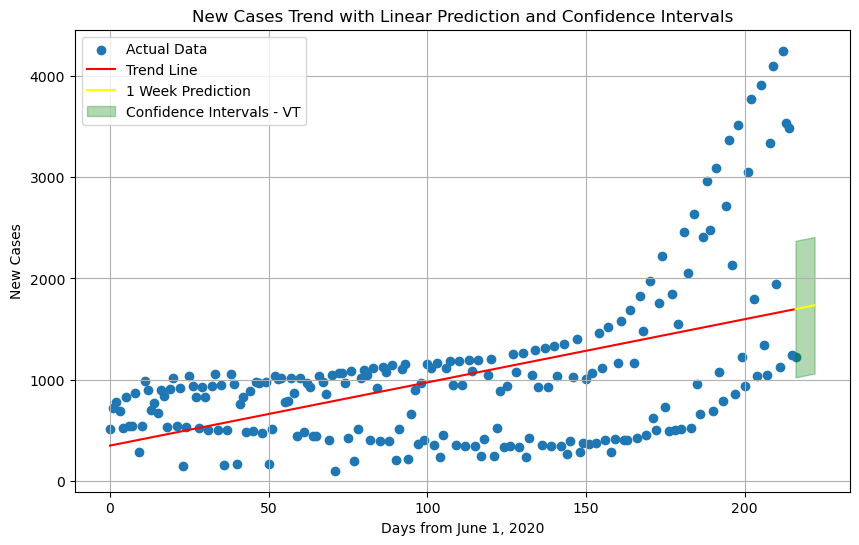

In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

weekly_cases_jj['Date'] = pd.to_datetime(weekly_cases_jj['Date'])

# Sort the DataFrame by date and reset the index
weekly_cases_jj = weekly_cases_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weekly_cases_jj.groupby('Date')

# Calculate the new cases for each group (date)
weekly_cases_jj['new_cases'] = grouped['cases'].diff().fillna(0)

# Set negative new cases to zero
weekly_cases_jj['new_cases'] = weekly_cases_jj['new_cases'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'New York' (replace with your state name)
selected_state = 'VT'

# Filter data for the selected state
state_data = weekly_cases_jj[weekly_cases_jj['State'] == selected_state]


ddaywise = state_data.groupby(['Date'])['new_cases'].sum().reset_index()
ddaywise['new_cases'] = ddaywise['new_cases'].astype(int)
 
start_date = pd.to_datetime('6/1/20') 
ddaywise['Days'] = (ddaywise['Date'] - start_date).dt.days

# Assuming 'X' represents your independent variable and 'y' is the target variable (e.g., 'New Cases')
X = ddaywise['Days'].values.reshape(-1, 1)
y = ddaywise['new_cases'].values
 
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for 1 week ahead (7 days)
future_days = np.array(range(ddaywise['Days'].max(), ddaywise['Days'].max() + 7)).reshape(-1, 1)
future_prediction = model.predict(future_days)

# Calculate confidence intervals (example: using standard deviation)
confidence = np.std(y - model.predict(X))

# Plotting the data and trend line
plt.figure(figsize=(10, 6))
plt.scatter(ddaywise['Days'], ddaywise['new_cases'], label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Trend Line')

# Plotting the future prediction and confidence intervals
plt.plot(future_days, future_prediction, color='yellow', linestyle='solid', label='1 Week Prediction')
plt.fill_between(future_days.flatten(), future_prediction - confidence, future_prediction + confidence, color='green', alpha=0.3, label=f'Confidence Intervals - {selected_state}')

plt.xlabel('Days from June 1, 2020')
plt.ylabel('New Cases')
plt.title('New Cases Trend with Linear Prediction and Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


## Cases Polynomial Regression  for state VT

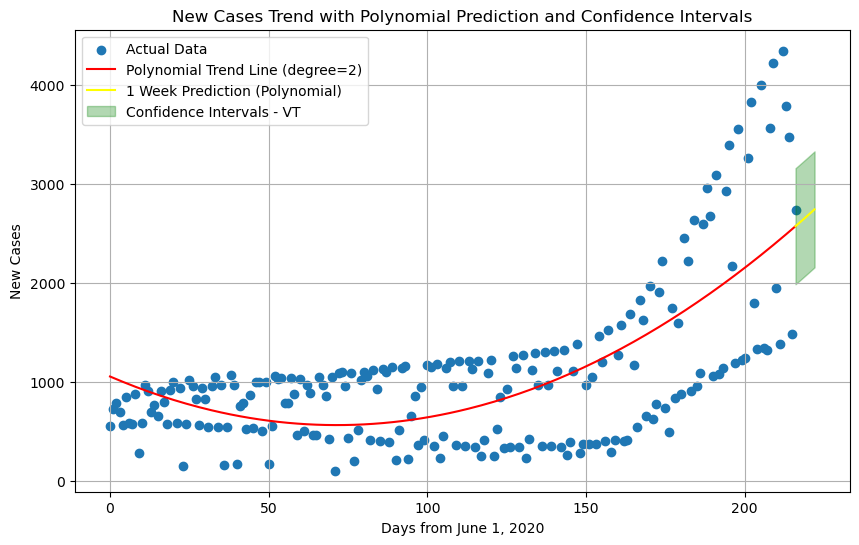

In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

weekly_cases_jj['Date'] = pd.to_datetime(weekly_cases_jj['Date'])

# Sort the DataFrame by date and reset the index
weekly_cases_jj = weekly_cases_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weekly_cases_jj.groupby('Date')

# Calculate the new cases for each group (date)
weekly_cases_jj['new_cases'] = grouped['cases'].diff().fillna(0)

# Set negative new cases to zero
weekly_cases_jj['new_cases'] = weekly_cases_jj['new_cases'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'New York' (replace with your state name)
selected_state = 'VT'
# Filter data for the selected state
state_data = weekly_cases_jj[weekly_cases_jj['State'] == selected_state]


ddaywise = state_data.groupby(['Date'])['new_cases'].sum().reset_index()
ddaywise['new_cases'] = ddaywise['new_cases'].astype(int)
 
start_date = pd.to_datetime('6/1/20') 
ddaywise['Days'] = (ddaywise['Date'] - start_date).dt.days

# Assuming 'X' represents your independent variable and 'y' is the target variable (e.g., 'New Cases')
X = ddaywise['Days'].values.reshape(-1, 1)
y = ddaywise['new_cases'].values
 

# Fit a polynomial regression model (degree=2, change as needed)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict for 1 week ahead (7 days)
future_days_poly = np.array(range(ddaywise['Days'].max(), ddaywise['Days'].max() + 7)).reshape(-1, 1)
future_days_poly = poly_features.transform(future_days_poly)
future_prediction_poly = model.predict(future_days_poly)

# Calculate confidence intervals (example: using standard deviation)
confidence_poly = np.std(y - model.predict(X_poly))

# Plotting the data and trend line for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(ddaywise['Days'], ddaywise['new_cases'], label='Actual Data')
plt.plot(X, model.predict(X_poly), color='red', label='Polynomial Trend Line (degree=2)')

# Plotting the future prediction and confidence intervals
plt.plot(future_days_poly[:, 1], future_prediction_poly, color='yellow', linestyle='solid', label='1 Week Prediction (Polynomial)')
plt.fill_between(future_days_poly[:, 1], future_prediction_poly - confidence_poly, future_prediction_poly + confidence_poly, color='green', alpha=0.3, label=f'Confidence Intervals - {selected_state}')

plt.xlabel('Days from June 1, 2020')
plt.ylabel('New Cases')
plt.title('New Cases Trend with Polynomial Prediction and Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


## Cases Polynomial Regression for top Five counties in VT

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/2873058466.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Days'] = (state_data['Date'] - start_date).dt.days


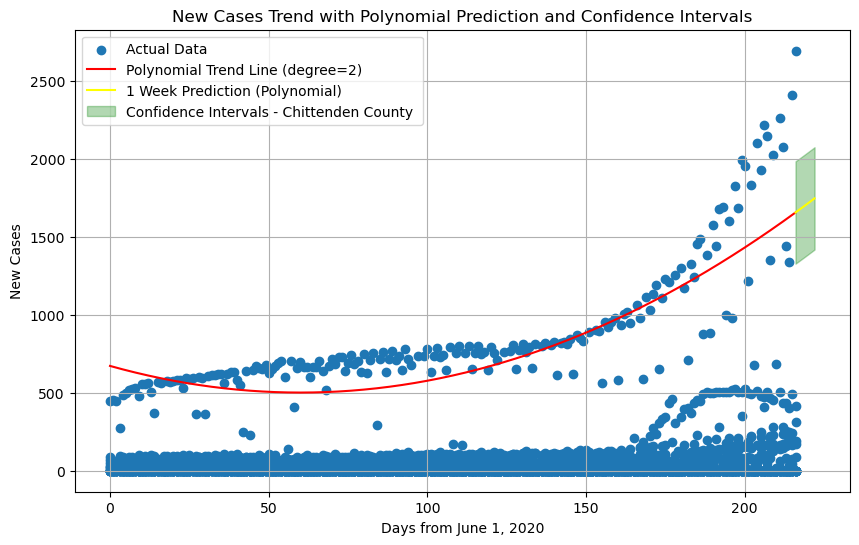

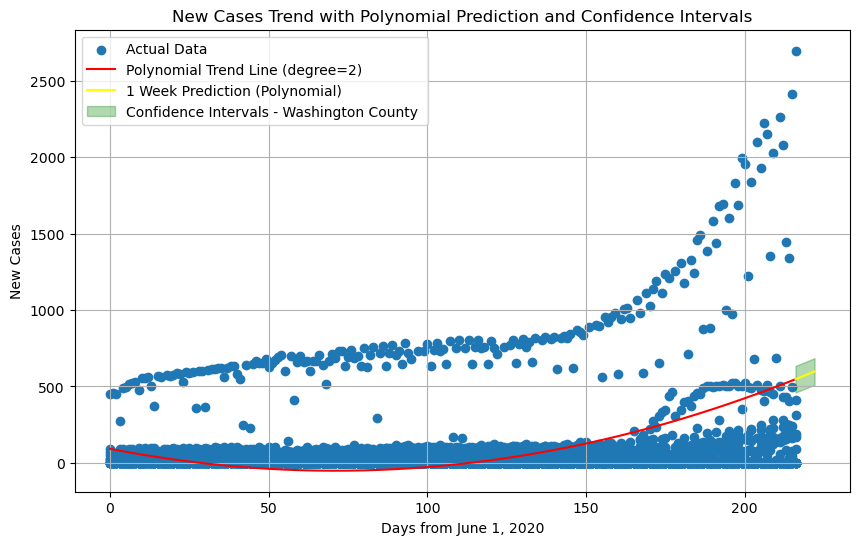

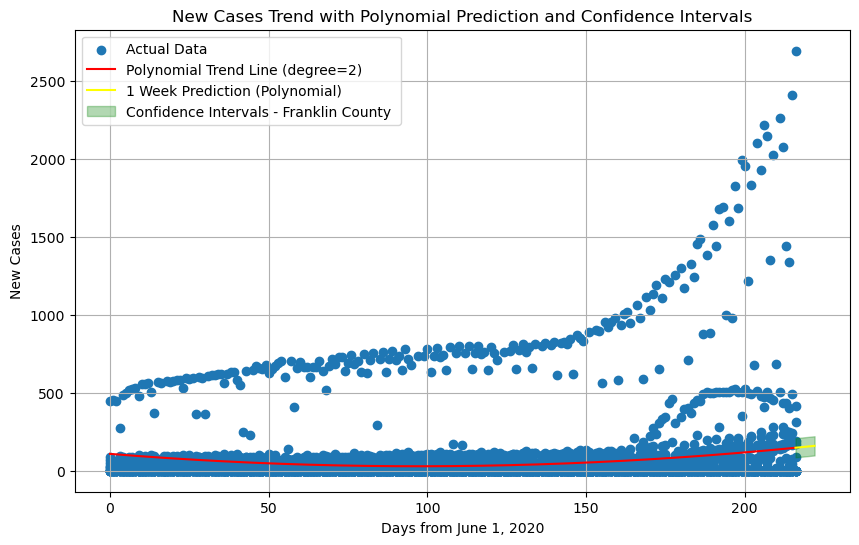

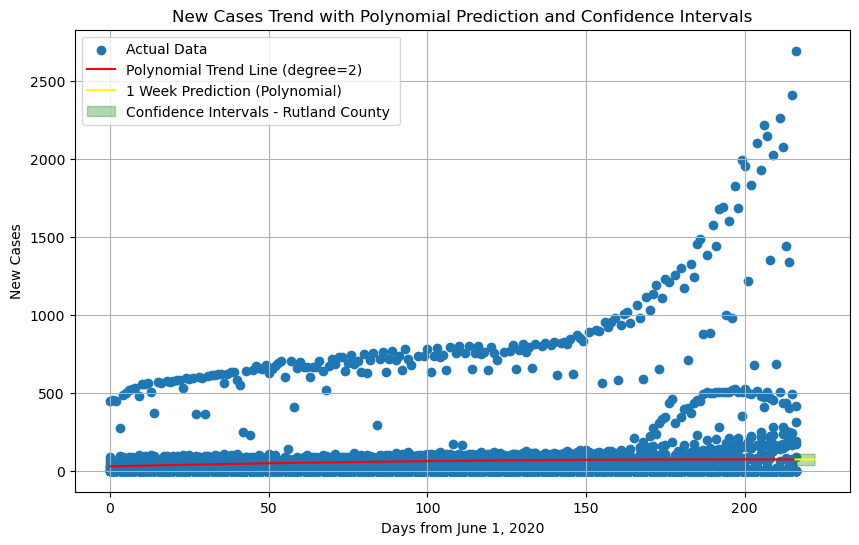

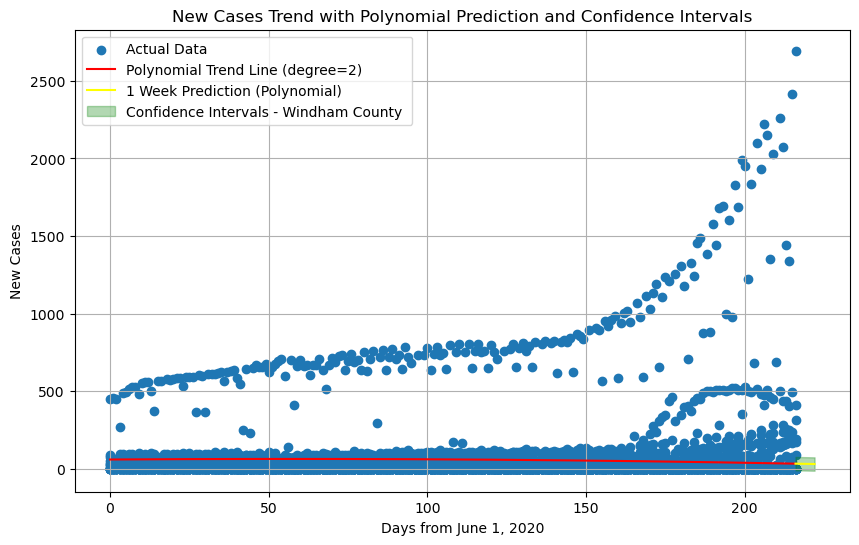

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


weekly_cases_jj['Date'] = pd.to_datetime(weekly_cases_jj['Date'])

# Sort the DataFrame by date and reset the index
weekly_cases_jj = weekly_cases_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weekly_cases_jj.groupby('Date')

# Calculate the new cases for each group (date)
weekly_cases_jj['new_cases'] = grouped['cases'].diff().fillna(0)

# Set negative new cases to zero
weekly_cases_jj['new_cases'] = weekly_cases_jj['new_cases'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'New York' (replace with your state name)
selected_state = 'VT'

# Filter data for the selected state
state_data = weekly_cases_jj[weekly_cases_jj['State'] == selected_state]
 
start_date = pd.to_datetime('6/1/20') 
state_data['Days'] = (state_data['Date'] - start_date).dt.days
top_counties = state_data.groupby('County Name').sum().nlargest(5, 'new_cases')


# Group data by State and County, get the top 5 counties with the highest cases
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]
    X = county_data['Days'].values.reshape(-1, 1)
    y = county_data['new_cases'].values
 
 
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

# Predict for 1 week ahead (7 days)
    future_days_poly = np.array(range(state_data['Days'].max(), state_data['Days'].max() + 7)).reshape(-1, 1)
    future_days_poly = poly_features.transform(future_days_poly)
    future_prediction_poly = model.predict(future_days_poly)

# Calculate confidence intervals (example: using standard deviation)
    confidence_poly = np.std(y - model.predict(X_poly))

# Plotting the data and trend line for polynomial regression
    plt.figure(figsize=(10, 6))
    plt.scatter(state_data['Days'], state_data['new_cases'], label='Actual Data')
    plt.plot(X, model.predict(X_poly), color='red', label='Polynomial Trend Line (degree=2)')

# Plotting the future prediction and confidence intervals
    plt.plot(future_days_poly[:, 1], future_prediction_poly, color='yellow', linestyle='solid', label='1 Week Prediction (Polynomial)')
    plt.fill_between(future_days_poly[:, 1], future_prediction_poly - confidence_poly, future_prediction_poly + confidence_poly, color='green', alpha=0.3, label=f'Confidence Intervals - {county}')

    plt.xlabel('Days from June 1, 2020')
    plt.ylabel('New Cases')
    plt.title('New Cases Trend with Polynomial Prediction and Confidence Intervals')
    plt.legend()
    plt.grid(True)
    plt.show()

 ## Cases Linear  Regression for top Five counties in VT


/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/3864993173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Days'] = (state_data['Date'] - start_date).dt.days


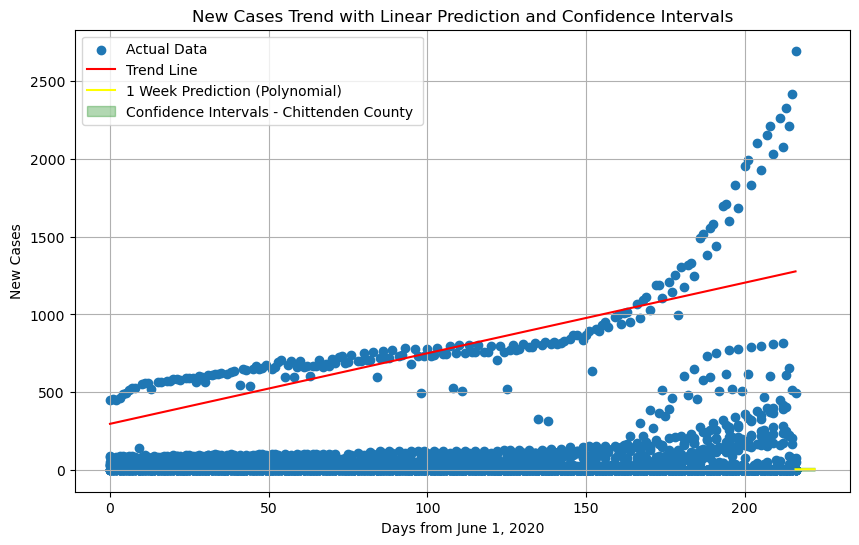

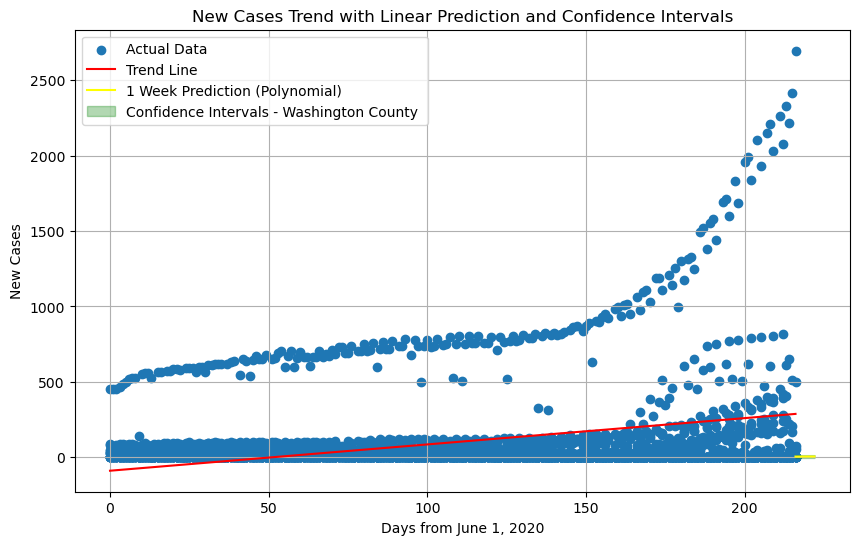

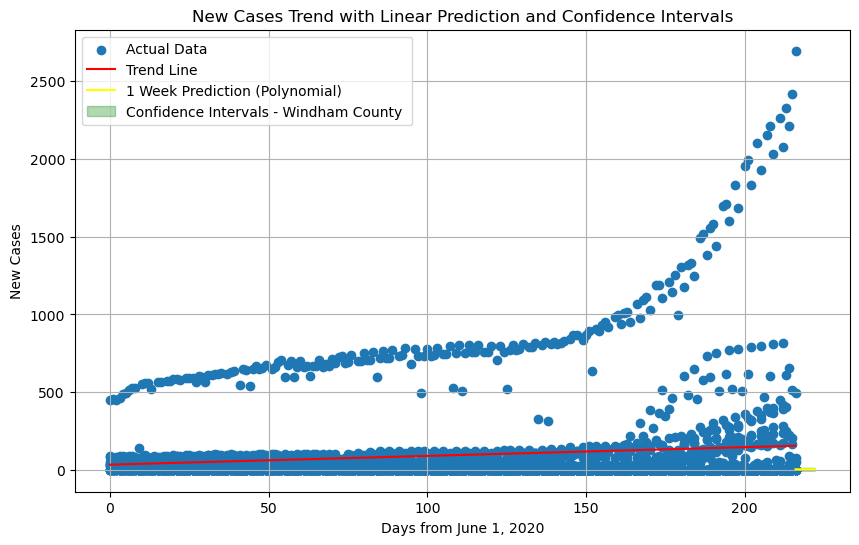

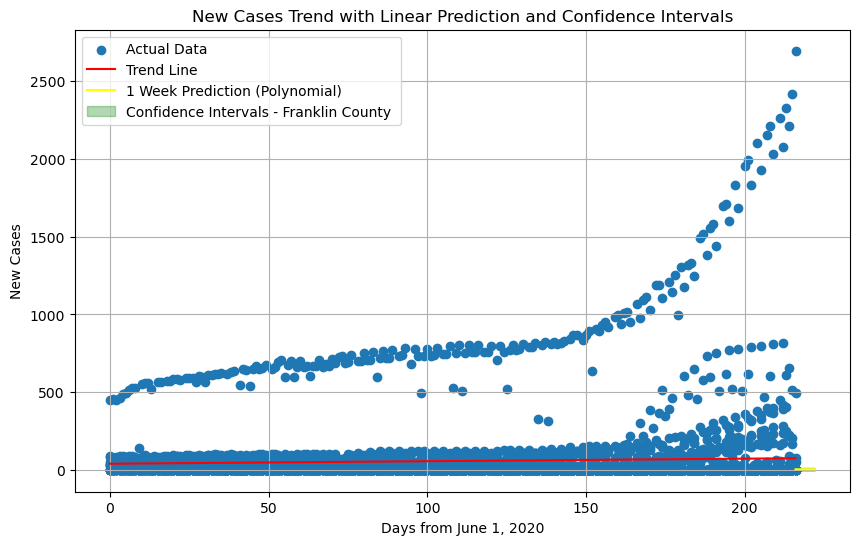

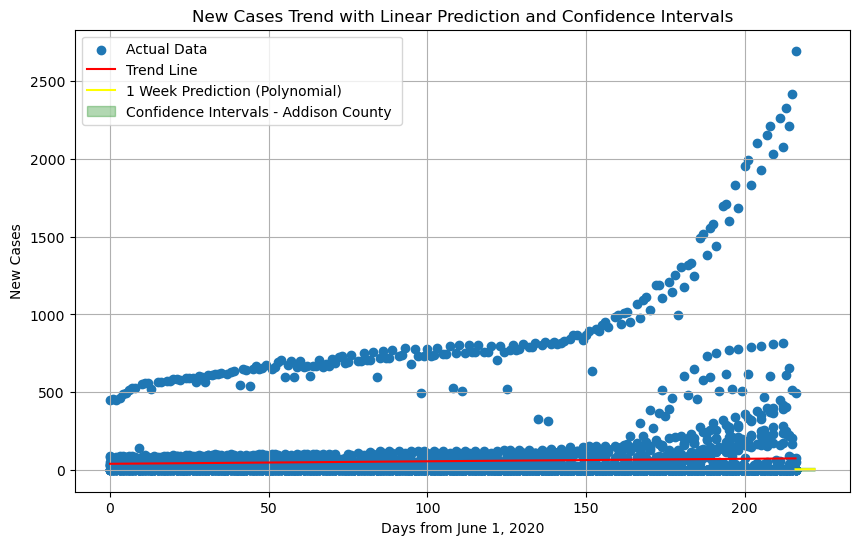

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


weekly_cases_jj['Date'] = pd.to_datetime(weekly_cases_jj['Date'])

# Sort the DataFrame by date and reset the index
weekly_cases_jj = weekly_cases_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weekly_cases_jj.groupby('Date')

# Calculate the new cases for each group (date)
weekly_cases_jj['new_cases'] = grouped['cases'].diff().fillna(0)

# Set negative new cases to zero
weekly_cases_jj['new_cases'] = weekly_cases_jj['new_cases'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'New York' (replace with your state name)
selected_state = 'VT'

# Filter data for the selected state
state_data = weekly_cases_jj[weekly_cases_jj['State'] == selected_state]
 
start_date = pd.to_datetime('6/1/20') 
state_data['Days'] = (state_data['Date'] - start_date).dt.days
top_counties = state_data.groupby('County Name').sum().nlargest(5, 'new_cases')


# Group data by State and County, get the top 5 counties with the highest cases
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]
    X = county_data['Days'].values.reshape(-1, 1)
    y = county_data['new_cases'].values
 
 
    model = LinearRegression()
    model.fit(X, y)

# Predict for 1 week ahead (7 days)
    future_days = np.array(range(state_data['Days'].max(), state_data['Days'].max() + 7)).reshape(-1, 1)
    future_prediction = model.predict(future_days)

# Calculate confidence intervals (example: using standard deviation)
    confidence = np.std(y - model.predict(X))

# Plotting the data and trend line
    plt.figure(figsize=(10, 6))
    plt.scatter(state_data['Days'], state_data['new_cases'], label='Actual Data')
    plt.plot(X, model.predict(X), color='red', label='Trend Line')
# Plotting the future prediction and confidence intervals
    plt.plot(future_days_poly[:, 1], future_prediction_poly, color='yellow', linestyle='solid', label='1 Week Prediction (Polynomial)')
    plt.fill_between(future_days_poly[:, 1], future_prediction_poly - confidence_poly, future_prediction_poly + confidence_poly, color='green', alpha=0.3, label=f'Confidence Intervals - {county}')

    plt.xlabel('Days from June 1, 2020')
    plt.ylabel('New Cases')
    plt.title('New Cases Trend with Linear Prediction and Confidence Intervals')
    plt.legend()
    plt.grid(True)
    plt.show()

## Deaths Linear Regression  for state VT

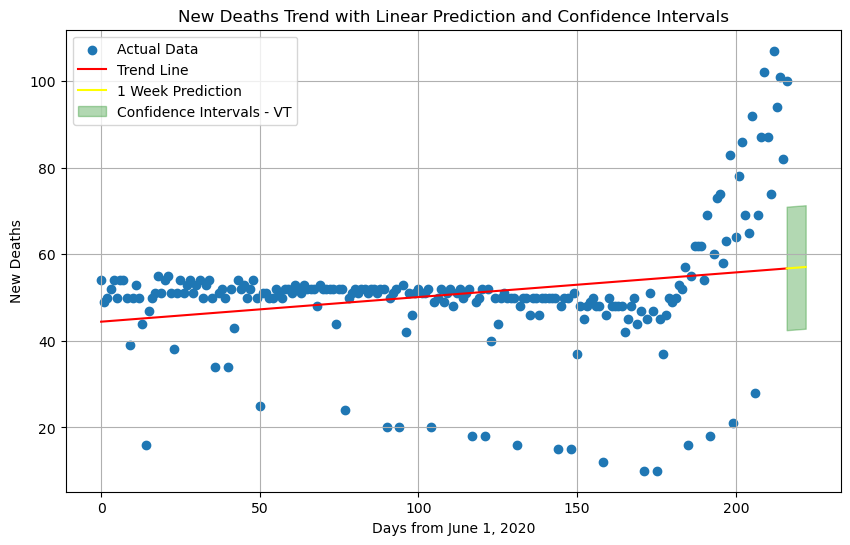

In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming weeklydeaths_jj is your DataFrame with death data

# Convert 'Date' column to datetime format
weeklydeaths_jj['Date'] = pd.to_datetime(weeklydeaths_jj['Date'])

# Sort the DataFrame by date and reset the index
weeklydeaths_jj = weeklydeaths_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weeklydeaths_jj.groupby('Date')

# Calculate the new deaths for each group (date)
weeklydeaths_jj['new_deaths'] = grouped['deaths'].diff().fillna(0)

# Set negative new deaths to zero
weeklydeaths_jj['new_deaths'] = weeklydeaths_jj['new_deaths'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'VT' (replace with your state name)
selected_state = 'VT'

daywise['new_deaths'] = daywise['new_deaths'].astype(int)
 
start_date = pd.to_datetime('6/1/20') 
daywise['Days'] = (daywise['Date'] - start_date).dt.days
# Assuming 'X' represents your independent variable and 'y' is the target variable (e.g., 'New Cases')
X = daywise['Days'].values.reshape(-1, 1)
y = daywise['new_deaths'].values

 
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for 1 week ahead (7 days)
future_days = np.array(range(daywise['Days'].max(), daywise['Days'].max() + 7)).reshape(-1, 1)
future_prediction = model.predict(future_days)

# Calculate confidence intervals (example: using standard deviation)
confidence = np.std(y - model.predict(X))

# Plotting the data and trend line
plt.figure(figsize=(10, 6))
plt.scatter(daywise['Days'], daywise['new_deaths'], label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Trend Line')

# Plotting the future prediction and confidence intervals
plt.plot(future_days, future_prediction, color='yellow', linestyle='solid', label='1 Week Prediction')
plt.fill_between(future_days.flatten(), future_prediction - confidence, future_prediction + confidence, color='green', alpha=0.3, label=f'Confidence Intervals - {selected_state}')

plt.xlabel('Days from June 1, 2020')
plt.ylabel('New Deaths')
plt.title('New Deaths Trend with Linear Prediction and Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

## Deaths  Polynomial Regression  for state VT

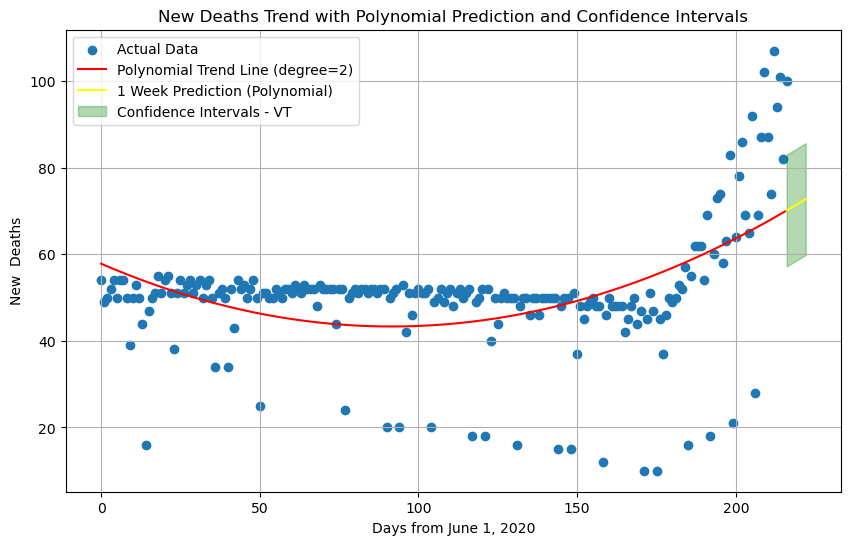

In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming weeklydeaths_jj is your DataFrame with death data

# Convert 'Date' column to datetime format
weeklydeaths_jj['Date'] = pd.to_datetime(weeklydeaths_jj['Date'])

# Sort the DataFrame by date and reset the index
weeklydeaths_jj = weeklydeaths_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weeklydeaths_jj.groupby('Date')

# Calculate the new deaths for each group (date)
weeklydeaths_jj['new_deaths'] = grouped['deaths'].diff().fillna(0)

# Set negative new deaths to zero
weeklydeaths_jj['new_deaths'] = weeklydeaths_jj['new_deaths'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'VT' (replace with your state name)
selected_state = 'VT'

#daywise = state_data.groupby(['Date'])['new_deaths'].sum().reset_index()
daywise['new_deaths'] = daywise['new_deaths'].astype(int)
 
start_date = pd.to_datetime('6/1/20') 
daywise['Days'] = (daywise['Date'] - start_date).dt.days
# Assuming 'X' represents your independent variable and 'y' is the target variable (e.g., 'New Cases')
X = daywise['Days'].values.reshape(-1, 1)
y = daywise['new_deaths'].values
 
# Fit a polynomial regression model (degree=2, change as needed)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict for 1 week ahead (7 days)
future_days_poly = np.array(range(daywise['Days'].max(), daywise['Days'].max() + 7)).reshape(-1, 1)
future_days_poly = poly_features.transform(future_days_poly)
future_prediction_poly = model.predict(future_days_poly)

# Calculate confidence intervals (example: using standard deviation)
confidence_poly = np.std(y - model.predict(X_poly))

# Plotting the data and trend line for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(daywise['Days'], daywise['new_deaths'], label='Actual Data')
plt.plot(X, model.predict(X_poly), color='red', label='Polynomial Trend Line (degree=2)')

# Plotting the future prediction and confidence intervals
plt.plot(future_days_poly[:, 1], future_prediction_poly, color='yellow', linestyle='solid', label='1 Week Prediction (Polynomial)')
plt.fill_between(future_days_poly[:, 1], future_prediction_poly - confidence_poly, future_prediction_poly + confidence_poly, color='green', alpha=0.3, label=f'Confidence Intervals - {selected_state}')

plt.xlabel('Days from June 1, 2020')
plt.ylabel('New  Deaths')
plt.title('New Deaths Trend with Polynomial Prediction and Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

## Deaths  Polynomial Regression for top Five counties in VT

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/1213243042.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Days'] = (state_data['Date'] - start_date).dt.days


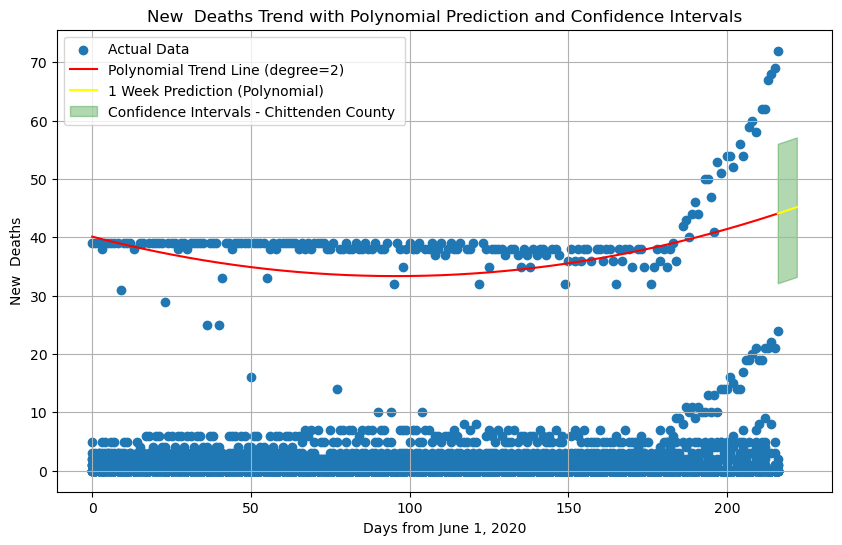

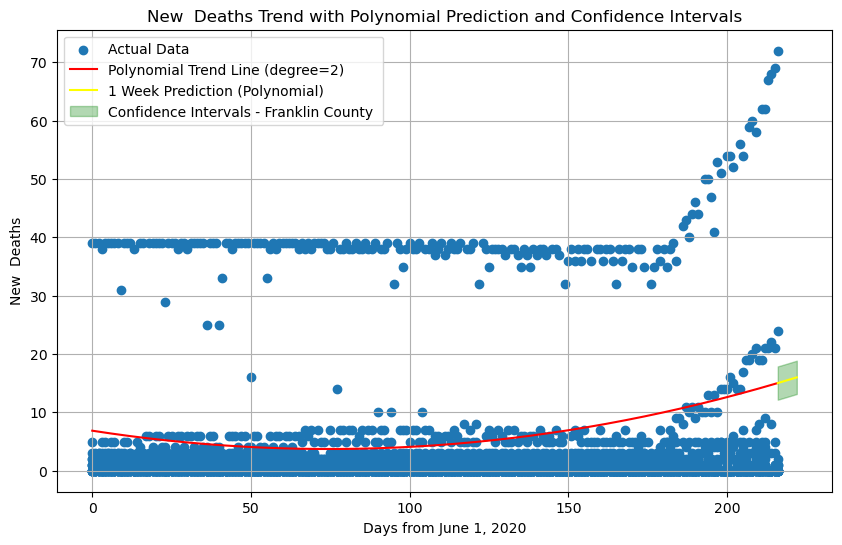

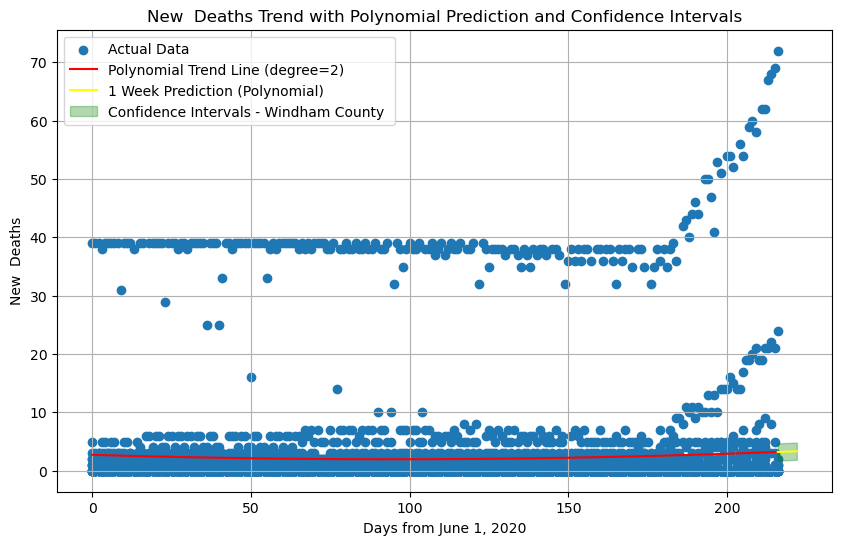

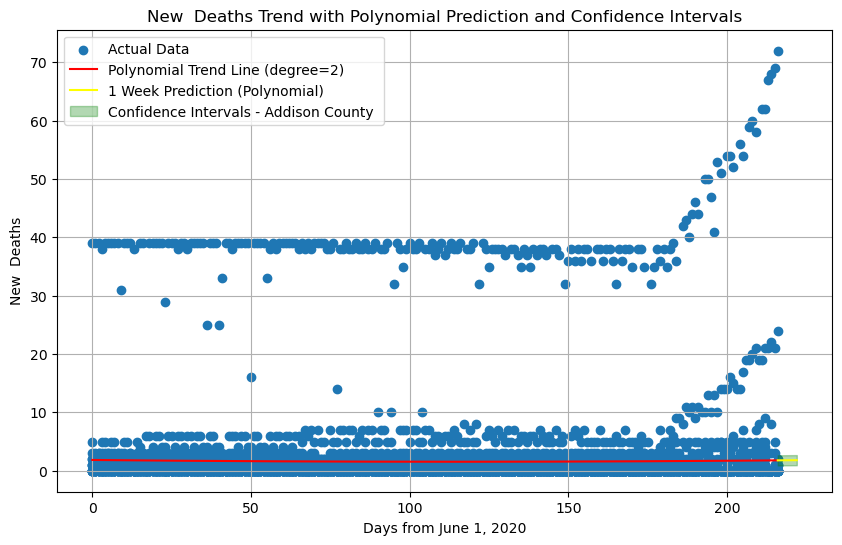

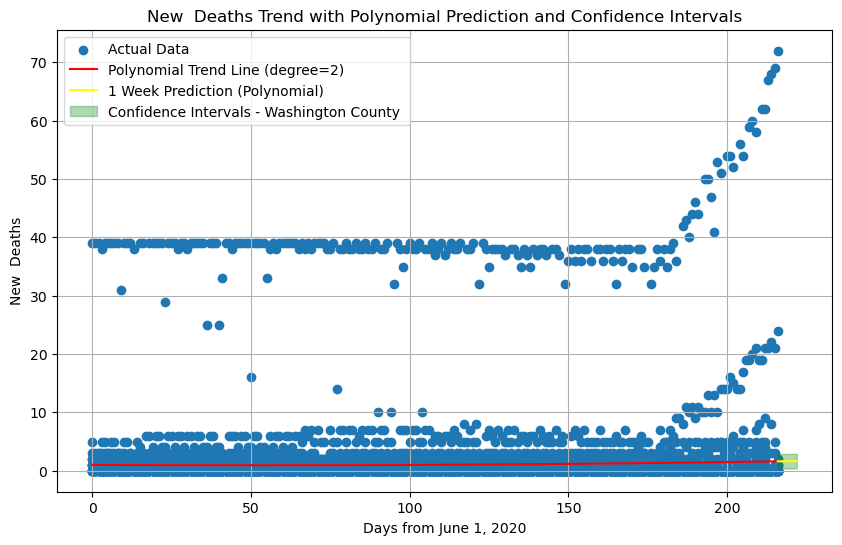

In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
weeklydeaths_jj['Date'] = pd.to_datetime(weeklydeaths_jj['Date'])

# Sort the DataFrame by date and reset the index
weeklydeaths_jj = weeklydeaths_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weeklydeaths_jj.groupby('Date')

# Calculate the new deaths for each group (date)
weeklydeaths_jj['new_deaths'] = grouped['deaths'].diff().fillna(0)

# Set negative new deaths to zero
weeklydeaths_jj['new_deaths'] = weeklydeaths_jj['new_deaths'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'VT' (replace with your state name)
selected_state = 'VT'

# Filter data for the selected state
state_data = weeklydeaths_jj[weeklydeaths_jj['State'] == selected_state]

# Calculate days from the start date
start_date = pd.to_datetime('6/1/20')
state_data['Days'] = (state_data['Date'] - start_date).dt.days

# Prepare data for the model
X = state_data['Days'].values.reshape(-1, 1)
y = state_data['new_deaths'].values
top_counties = state_data.groupby('County Name').sum().nlargest(5, 'new_deaths')

# Group data by State and County, get the top 5 counties with the highest cases
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]
    X = county_data['Days'].values.reshape(-1, 1)
    y = county_data['new_deaths'].values
 
 
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

# Predict for 1 week ahead (7 days)
    future_days_poly = np.array(range(state_data['Days'].max(), state_data['Days'].max() + 7)).reshape(-1, 1)
    future_days_poly = poly_features.transform(future_days_poly)
    future_prediction_poly = model.predict(future_days_poly)

# Calculate confidence intervals (example: using standard deviation)
    confidence_poly = np.std(y - model.predict(X_poly))

# Plotting the data and trend line for polynomial regression
    plt.figure(figsize=(10, 6))
    plt.scatter(state_data['Days'], state_data['new_deaths'], label='Actual Data')
    plt.plot(X, model.predict(X_poly), color='red', label='Polynomial Trend Line (degree=2)')

# Plotting the future prediction and confidence intervals
    plt.plot(future_days_poly[:, 1], future_prediction_poly, color='yellow', linestyle='solid', label='1 Week Prediction (Polynomial)')
    plt.fill_between(future_days_poly[:, 1], future_prediction_poly - confidence_poly, future_prediction_poly + confidence_poly, color='green', alpha=0.3, label=f'Confidence Intervals - {county}')

    plt.xlabel('Days from June 1, 2020')
    plt.ylabel('New  Deaths')
    plt.title('New  Deaths Trend with Polynomial Prediction and Confidence Intervals')
    plt.legend()
    plt.grid(True)
    plt.show()


 ## Deaths Linear  Regression for top Five counties in VT

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_1072/32508283.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Days'] = (state_data['Date'] - start_date).dt.days


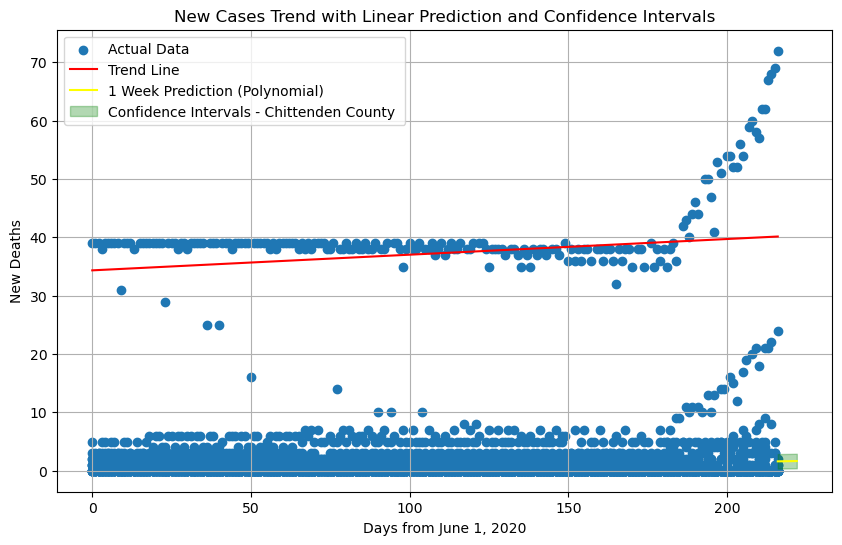

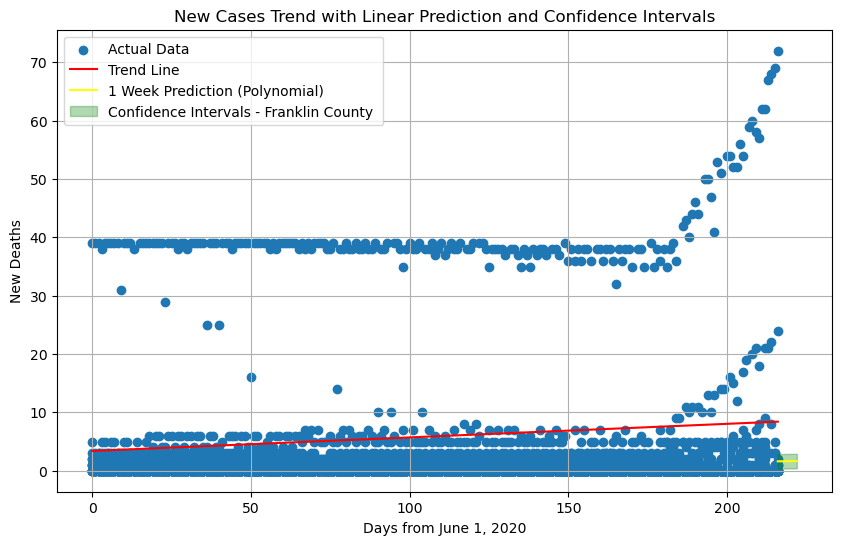

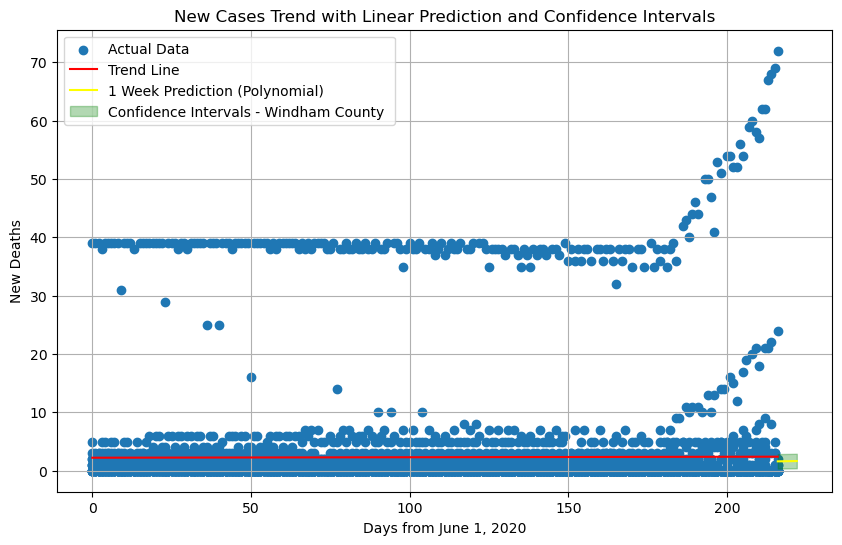

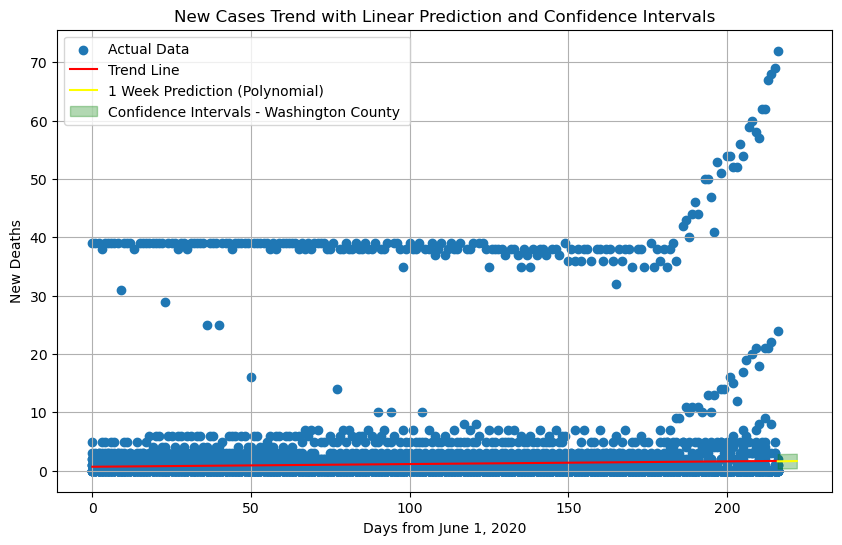

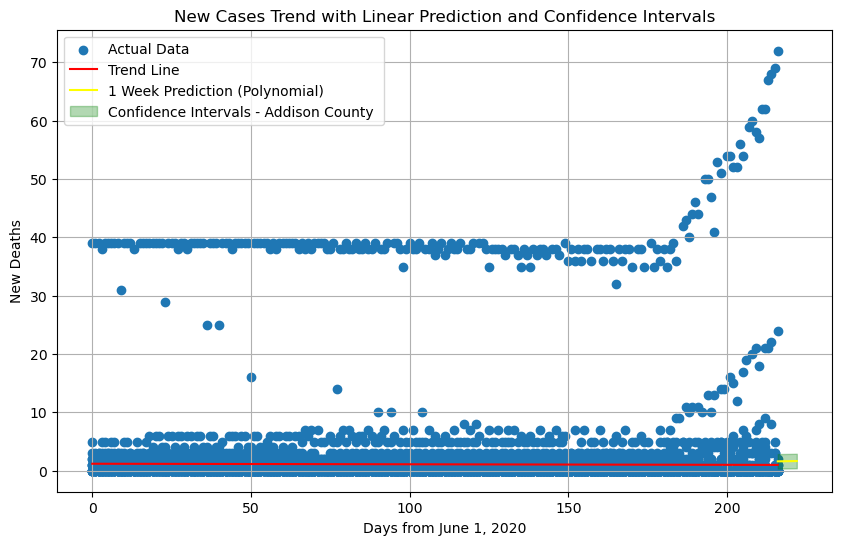

In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
weeklydeaths_jj['Date'] = pd.to_datetime(weeklydeaths_jj['Date'])

# Sort the DataFrame by date and reset the index
weeklydeaths_jj = weeklydeaths_jj.sort_values(by=['Date']).reset_index(drop=True)

# Group the data by "Date"
grouped = weeklydeaths_jj.groupby('Date')

# Calculate the new deaths for each group (date)
weeklydeaths_jj['new_deaths'] = grouped['deaths'].diff().fillna(0)

# Set negative new deaths to zero
weeklydeaths_jj['new_deaths'] = weeklydeaths_jj['new_deaths'].apply(lambda x: max(0, x))

# Filter data for a specific state, for instance, 'VT' (replace with your state name)
selected_state = 'VT'

# Filter data for the selected state
state_data = weeklydeaths_jj[weeklydeaths_jj['State'] == selected_state]

# Calculate days from the start date
start_date = pd.to_datetime('6/1/20')
state_data['Days'] = (state_data['Date'] - start_date).dt.days

# Prepare data for the model
X = state_data['Days'].values.reshape(-1, 1)
y = state_data['new_deaths'].values
top_counties = state_data.groupby('County Name').sum().nlargest(5, 'new_deaths')

# Group data by State and County, get the top 5 counties with the highest cases
for county in top_counties.index:
    county_data = state_data[state_data['County Name'] == county]
    X = county_data['Days'].values.reshape(-1, 1)
    y = county_data['new_deaths'].values
     
 
    model = LinearRegression()
    model.fit(X, y)

# Predict for 1 week ahead (7 days)
    future_days = np.array(range(state_data['Days'].max(), state_data['Days'].max() + 7)).reshape(-1, 1)
    future_prediction = model.predict(future_days)

# Calculate confidence intervals (example: using standard deviation)
    confidence = np.std(y - model.predict(X))

# Plotting the data and trend line
    plt.figure(figsize=(10, 6))
    plt.scatter(state_data['Days'], state_data['new_deaths'], label='Actual Data')
    plt.plot(X, model.predict(X), color='red', label='Trend Line')
# Plotting the future prediction and confidence intervals
    plt.plot(future_days_poly[:, 1], future_prediction_poly, color='yellow', linestyle='solid', label='1 Week Prediction (Polynomial)')
    plt.fill_between(future_days_poly[:, 1], future_prediction_poly - confidence_poly, future_prediction_poly + confidence_poly, color='green', alpha=0.3, label=f'Confidence Intervals - {county}')

    plt.xlabel('Days from June 1, 2020')
    plt.ylabel('New Deaths')
    plt.title('New Cases Trend with Linear Prediction and Confidence Intervals')
    plt.legend()
    plt.grid(True)
    plt.show()